# <center> Lecture14 : Hierarchical Regression Models</center>  
 
## <center> Instructor: Dr. Hu Chuan-Peng </center> 

## Intro  

在上一节课中，我们学习了分层模型 (Hierarchical Models) 的基本概念，并探讨了分层模型的优点，然而这些模型本质是某个变量的估计，没有考虑实验条件的影响。  

但更多的情况下，我们是希望看到自变量与因变量的关系，这时需要结合回归分析方法。  

本节课，我们将层级模型与回归模型相结合，重点讲解分层线性模型 (Hierarchical Regression Models) 的应用。  

前几次课的练习均使用了“压力与自我控制关系”的例子，本节课将以该例子介绍分层线性模型的基本概念，在练习阶段时再回到随机点运动范式的情境。  

![Image Name](https://cdn.kesci.com/upload/image/rkz1ehen1l.png?imageView2/0/w/720/h/960)  




在上节课的练习中，仅考虑了自我控制分数在不同站点和不同个体间的变化。  

🤔 然而，压力对自我控制的影响是否在不同站点间存在差异？  

* 一种不太可能的情景是，不同站点间的自我控制分数没有差异，并且压力对自我控制的影响在不同站点间也相同，如图A。
* 一种可能是，自我控制分数在不同站点间存在差异，但是压力对自我控制的影响在不同站点不存在差异，如图B。  
* 另一种可能是，站点只调节压力对自我控制的影响，而各站点间自我控制分数相当，如图C。  
* 最后，站点可能既影响自我控制分数，又影响压力对自我控制的效应，如图D。  


![Image Name](https://cdn.kesci.com/upload/s5sh35okpe.png?imageView2/0/w/640/h/640)  

在本节课中，我们将介绍引入包含自变量时的层级模型，并通过不同的模型验证不同的假设：  
* H0(model 0)，图A，普通线性模型，仅考虑压力对自我控制的影响。  
* H1(model 1)，图B，变化截距模型，在模型0的基础上考虑自我控制在不同站点的变化。  
* H2(model 2)，图C，变化斜率模型，在模型0的基础上不同站点间的压力影响的变化。  
* H3(model 3)，图D，变化截距和斜率模型，结合模型1和模型2，同时考虑站点对自我控制以及压力影响的变化。  

![Image Name](https://cdn.kesci.com/upload/s5sh35okpe.png?imageView2/0/w/640/h/640)

## 回顾：贝叶斯回归模型的数学表达式  

在第八节课中讲解了贝叶斯的回归模型，还记得它的数学表达式吗？  

$$  
\begin{align*}  
\beta_0   &\sim N\left(m_0, s_0^2 \right)  \\  
\beta_1   &\sim N\left(m_1, s_1^2 \right)  \\  
\sigma    &\sim \text{Exp}(\lambda)        \\  
&\Downarrow \\  
\mu_i &= \beta_0 + \beta_1 X_i             \\  
&\Downarrow \\  
Y_i | \beta_0, \beta_1, \sigma &\sim N\left(\mu_i, \sigma^2\right). \\  
\end{align*}  
$$  

* 回归模型需满足如下假设：  

    1. 独立观测假设:每个观测值$Y_i$是相互独立的。  

    2. 线性关系假设: 预测值$\mu_i$和自变量$X_i$之间可以用线性关系来描述，即：$\mu_i = \beta_0 + \beta_1 X_i$  

    3. 方差同质性假设： 在任意自变量的取值下，观测值$Y_i$都会以$\mu_i$为中心，同样的标准差$\sigma$呈正态分布变化（$\sigma$ is consistent）  





贝叶斯回归模型的优势：

允许将实验假设以回归参数的形式进行表达，并通过后验分布来量化这些假设的合理性。

$$  
RT_{sec} \sim \mathcal{N}(\beta_0 + \beta_1 \cdot Label, \sigma^2)  
$$  

* 通过后验分布检验 $\beta_1$ 是否显著，例如计算 $\beta_1 > 0$ 或 $\beta_1 < 0$ 的概率，或计算最高密度区间（HDI）。如果 95% HDI 不包含 0，可以认为自我条件和他人条件在反应时间上的差异是显著的。
* 在贝叶斯框架下，我们不仅可以观察参数的点估计（如 $\beta_1$ 的均值），还可以通过后验分布和 HDI 提供更加直观的置信水平解释。

![Image Name](https://cdn.kesci.com/upload/smkijcu8co.png?imageView2/0/w/650)  

*(改编自：https: // saylordotorg.github.io/text_introductory-statistics/s14-03-modelling-linear-relationships.html)*  

<br><br>  

<div style="padding-bottom: 20px;"></div>

## Model0: Complete pooling  


以 “压力与自我控制关系” 为例， 如果忽略数据的层级结构，认为所有数据都来自一个更大的总体，只需要用一个回归方程来描述自变量与因变量的关系。  

$$  
\begin{array}{lcrl}  
\text{data:} & \hspace{.05in} &   Y_i | \beta_0, \beta_1, \sigma & \stackrel{ind}{\sim} N\left(\mu_i, \sigma^2\right) \;\; \text{ with } \;\; \mu_i = \beta_0 + \beta_1X_i \\  

\text{priors:} & & \beta_{0}  & \sim N\left(0, 50^2 \right)  \\  
                    & & \beta_1  & \sim N\left(0, 5^2 \right) \\  
                    & & \sigma   & \sim \text{Exp}(1)  \\  
\end{array}  
$$ 

* 其中， $Y_i$ 是第 $i$ 个被试的自我控制分数，
* $X_i$ 是第 $i$ 个被试的压力得分，
* $\beta_0$ 和 $\beta_1$ 是回归系数，$\sigma$ 是残差的标准差。
* $\beta_1$ 代表了压力与自我控制之间的关系。  

![Image Name](https://cdn.kesci.com/upload/s3y4rmsym1.png?imageView2/0/w/960/h/960)  

In [1]:
# 导入 pymc 模型包，和 arviz 等分析工具 
import pymc as pm
import arviz as az
import seaborn as sns
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import ipywidgets
import bambi as bmb

# 忽略不必要的警告
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 通过 pd.read_csv 加载数据 Data_Sum_HPP_Multi_Site_Share.csv
try:
  df_raw = pd.read_csv('/home/mw/input/bayes3797/Data_Sum_HPP_Multi_Site_Share.csv')
except:
  df_raw = pd.read_csv('data/Data_Sum_HPP_Multi_Site_Share.csv')

# 选取所需站点
first5_site = ['Southampton','Portugal','Kassel','Tsinghua','UCSB']
df_first5 = df_raw.query("Site in @first5_site")
# 生成站点索引
df_first5["site_idx"] = pd.factorize(df_first5.Site)[0]
# 生成被试数索引
df_first5["obs_id"] = range(len(df_first5))
# 将站点、被试id设置为索引
df_first5.set_index(['Site','obs_id'],inplace=True,drop=False)

In [3]:
df_first5

age   anxiety  anxiety_r  artgluctot  attachhome  \
Site   obs_id                                                        
Kassel 0       1955.0  3.500000   0.323789         0.0    3.222222   
       1       1959.0  1.500000  -1.380456         0.0    4.444444   
       2       1965.0  1.333333  -1.522476         0.0    3.666667   
       3       1966.0  3.222222   0.087088         0.0    4.333333   
       4       1969.0  3.444444   0.276448         0.0    3.555556   
...               ...       ...        ...         ...         ...   
UCSB   410        NaN  4.611111   0.955335         1.0    4.666667   
       411        NaN  4.555556   0.910241         0.0    4.333333   
       412        NaN  5.166667   1.406280         0.0    3.555556   
       413        NaN  4.388889   0.774957         0.0    4.666667   
       414        NaN  1.166667  -1.840523         0.0    3.777778   

               attachphone  AvgHumidity    avgtemp  avoidance  avoidance_r  \
Site   obs_id                                                                
Kassel 0          3.666667         89.0  36.300000   3.777778     1.061474   
       1          2.111111          NaN  36.600000   2.722222    -0.124879   
       2          2.000000          NaN  35.450000   2.611111    -0.249759   
       3          1.000000          NaN  36.630000   3.166667     0.374638   
       4          1.444444         69.0  36.465000   3.222222     0.437077   
...                    ...          ...        ...        ...          ...   
UCSB   410        5.000000         51.0  36.494444   2.055556    -1.083724   
       411        2.888889         86.0  36.611111   5.000000     1.633418   
       412        2.666667         76.0  36.805556   5.000000     1.633418   
       413        3.111111         87.0  36.805556   4.666667     1.325817   
       414        2.777778         71.0  36.944444   2.944444    -0.263455   

               ...  sex    Site  smoke  socialdiversity  socialembedded  \
Site   obs_id  ...                                                        
Kassel 0       ...  1.0  Kassel    2.0                6               3   
       1       ...  2.0  Kassel    2.0                7               4   
       2       ...  1.0  Kassel    2.0                5               2   
       3       ...  2.0  Kassel    2.0                9               2   
       4       ...  2.0  Kassel    2.0               11               3   
...            ...  ...     ...    ...              ...             ...   
UCSB   410     ...  2.0    UCSB    2.0                6               4   
       411     ...  2.0    UCSB    2.0                9               2   
       412     ...  1.0    UCSB    2.0                6               6   
       413     ...  2.0    UCSB    1.0                9               7   
       414     ...  2.0    UCSB    2.0                9               6   

               socTherm  soliTherm  stress  site_idx  obs_id  
Site   obs_id                                                 
Kassel 0            3.0      3.125      30         0       0  
       1            2.4      3.125      30         0       1  
       2            3.8      2.375      31         0       2  
       3            3.6      2.875      47         0       3  
       4            2.2      2.750      50         0       4  
...                 ...        ...     ...       ...     ...  
UCSB   410          3.8      3.125      48         4     410  
       411          3.8      3.125      45         4     411  
       412          2.2      3.250      27         4     412  
       413          2.6      3.625      46         4     413  
       414          2.8      3.375      30         4     414  

[415 rows x 39 columns]

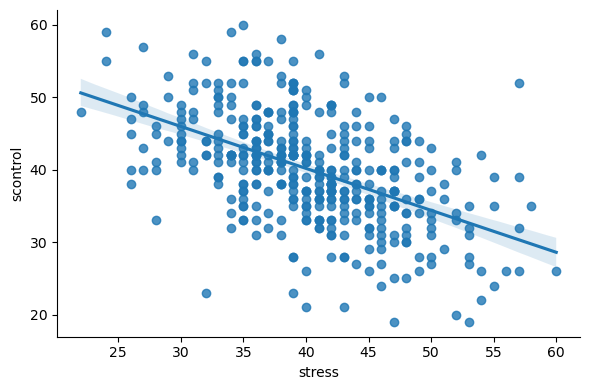

In [4]:
# 通过完全池化的方式可视化数据
sns.lmplot(df_first5,
           x="stress",
           y="scontrol",
           height=4, aspect=1.5)

### 模型定义与采样

$$  
\begin{array}{lcrl}  
\text{data:} & \hspace{.05in} &   Y_i | \beta_0, \beta_1, \sigma & \stackrel{ind}{\sim} N\left(\mu_i, \sigma^2\right) \;\; \text{ with } \;\; \mu_i = \beta_0 + \beta_1X_i \\  

\text{priors:} & & \beta_{0}  & \sim N\left(0, 50^2 \right)  \\  
                    & & \beta_1  & \sim N\left(0, 5^2 \right) \\  
                    & & \sigma   & \sim \text{Exp}(1)  \\  
\end{array}  
$$ 

In [5]:
# 定义坐标映射
coords = {"obs_id": df_first5.obs_id}

with pm.Model(coords=coords) as complete_pooled_model:

    beta_0 = pm.Normal("beta_0", mu=0, sigma=50)                #定义beta_0          
    beta_1 = pm.Normal("beta_1", mu=0, sigma=5)                 #定义beta_1
    sigma = pm.Exponential("sigma", 1)                          #定义sigma

    x = pm.MutableData("x", df_first5.stress, dims="obs_id")    #x是自变量压力水平

    mu = pm.Deterministic("mu",beta_0 + beta_1 * x, 
                          dims="obs_id")                        #定义mu，讲自变量与先验结合

    likelihood = pm.Normal("y_est", mu=mu, sigma=sigma, observed=df_first5.scontrol,
                           dims="obs_id")                       #定义似然：预测值y符合N(mu, sigma)分布
                                                                #通过 observed 传入实际数据y 自我控制水平
    complete_trace = pm.sample(random_seed=84735)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, beta_1, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


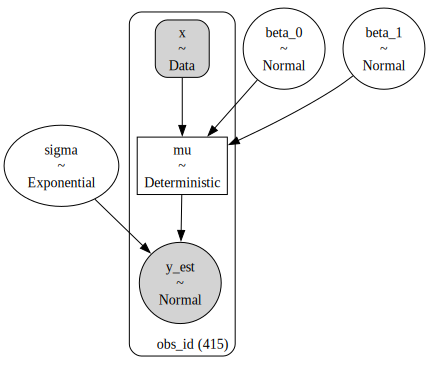

In [6]:
pm.model_to_graphviz(complete_pooled_model)

### 后验参数估计：  

结果显示：  

$\mu_i = \beta_0 + \beta_1X_i$  
- $\beta_0 = 63.17$  
- $\beta_1 = -0.58$

$\beta_1 = -0.58$ 表明，在给定站点的情况下，自我控制水平与压力水平之间存在负相关关系。并且，压力分数每增加1分，自我控制水平平均下降0.58分。

In [7]:
az.summary(complete_trace,
           var_names=["~mu"],
           filter_vars="like")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_0,63.259,1.967,59.581,66.964,0.054,0.038,1346.0,1556.0,1.0
beta_1,-0.577,0.048,-0.670,-0.490,0.001,0.001,1362.0,1538.0,1.0
sigma,6.471,0.218,6.061,6.877,0.005,0.004,1752.0,1796.0,1.0


### 后验预测回归线  

* 完全池化模型假设，所有站点中自我控制分数一致，并且压力的影响也一致。  
* 下图展示了不同站点下后验预测的结果，可以看到他们的回归线是一致的。

In [8]:
#提取不同站点数据对应的索引并储存，便于后续将后验预测数据按照站点进行提取
def get_group_index(data):
    group_index = {}
    for i, group in enumerate(data["Site"].unique()):
        group_index[group] = xr.DataArray(data.query(f"Site == '{group}'"))["obs_id"].values
    return group_index

#定义函数，绘制不同站点下的后验预测回归线
def plot_regression(data, trace, group_index):
    # 定义画布，根据站点数量定义画布的列数
    fig, ax = plt.subplots(1,len(data["Site"].unique()), 
                       sharex=True,
                       sharey=True,
                       figsize=(15,5))
    
    # 根据站点数来分别绘图
    # 我们需要的数据有原始数据，每一个因变量的后验预测均值
    # 这些数据都储存在后验参数采样结果中，也就是这里所用的trace
    for i, group in enumerate(data["Site"].unique()):
        #绘制真实数据的散点图
        x = trace.constant_data.x.sel(obs_id = group_index[f"{group}"])
        y = trace.observed_data.y_est.sel(obs_id = group_index[f"{group}"])
        mu = trace.posterior.mu.sel(obs_id = group_index[f"{group}"])
        ax[i].scatter(x, y,
                color=f"C{i}",
                alpha=0.5)
        #绘制回归线
        ax[i].plot(x, mu.stack(sample=("chain","draw")).mean(dim="sample"),
                color=f"C{i}",
                alpha=0.5)
        #绘制预测值95%HDI
        az.plot_hdi(
            x, mu,
            hdi_prob=0.95,
            fill_kwargs={"alpha": 0.25, "linewidth": 0},
            color=f"C{i}",
            ax=ax[i])
    # 生成横坐标名称
    fig.text(0.5, 0, 'Stress', ha='center', va='center', fontsize=12)
    # 生成纵坐标名称
    fig.text(0.08, 0.5, 'Self control', ha='center', va='center', rotation='vertical', fontsize=12)
    # 生成标题
    plt.suptitle("Posterior regression models", fontsize=15)
        
    sns.despine()

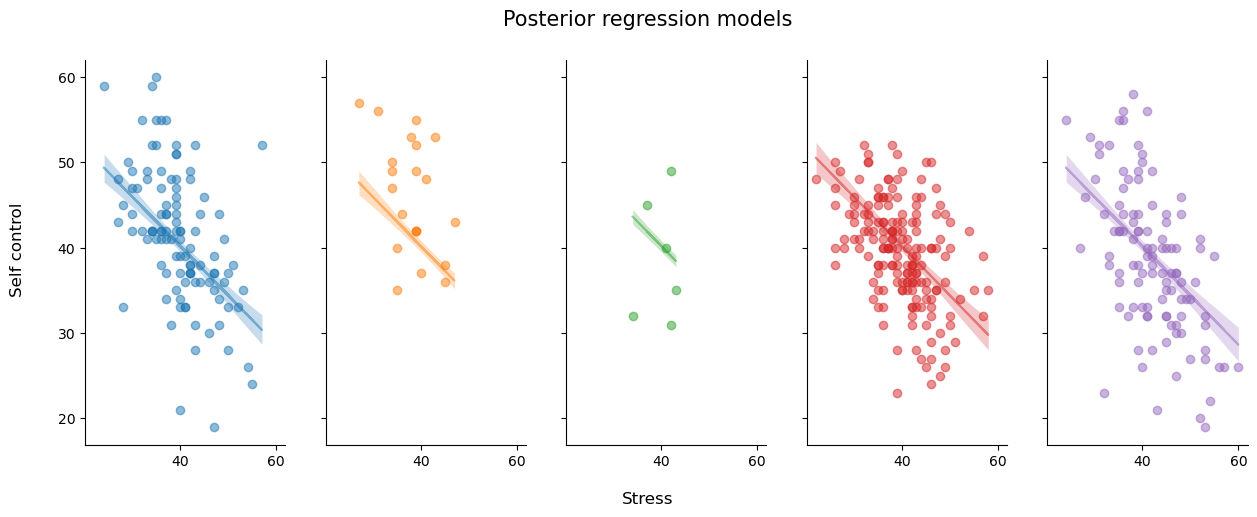

In [9]:
# 获取每个站点数据的索引
first5_index = get_group_index(data=df_first5)
# 进行可视化
plot_regression(data=df_first5,
                trace=complete_trace,
                group_index=first5_index)

## Partial pooling & hierarchical model  

完全池化 (complete pooling) 模型假设所有站点下回归模型的截距 ($\beta_0$) 和斜率 ($\beta_1$) 都相同。没有考虑到不同站点下回归模型的截距 ($\beta_0$) 和斜率 ($\beta_1$) 都可能发生变化的情况。

而在上节课的学习中，我们知道部分池化 (partial pooling) 模型可以解决这一问题。 

🤔 问题在于：如何将部分池化方法应用于回归模型？

![Image Name](https://cdn.kesci.com/upload/s5eeyrh0s5.png?imageView2/0/w/700)  

* $j$来表示站点，$j \in \{1,2, \ldots, 5\}$  
* $i$来表示站点内部的每一个数据$i \in \{1,2,\ldots,n_j\}$  
* 每一个被试的数据可以被表示为$Y_{ij}$，表示站点$j$内的第$i$个被试的自我控制分数观测值  

$$  
Y := \left((Y_{11}, Y_{21}, \ldots, Y_{n_1,1}), (Y_{12}, Y_{22}, \ldots, Y_{n_2,2}), \ldots, (Y_{1,5}, Y_{2,5}, \ldots, Y_{n_{5},5})\right)  .  
$$ 

本节课将重点讲解3种不同情况下的部分池化模型，以考虑回归模型的截距 ($\beta_0$) 和斜率 ($\beta_1$) 如何随着站点进行变化。

Outline:  
1. 考虑截距 ($\beta_0$)随站点变化的模型 (model1，变化截距模型)  
2. 考虑斜率 ($\beta_1$) 随站点变化的模型 (model2，变化斜率模型)  
3. 同时考虑截距 ($\beta_0$)和斜率 ($\beta_1$) 随站点的变化 (model3，变化截距和斜率模型)  
4. 最后，考虑分层回归模型中如何纳入组层面预测因子（group-level predictors）的影响。
  - 例如，相对于个体压力对于自我控制的影响，不同站点的气候是否对自我控制有影响。
  - 个体压力是个体层面的预测因子，气候是*组层面的预测因子*。

##  Model1: Hierarchical model with varying intercepts  

相较于没有自变量的分层模型，构建包含自变量的分层模型的关键在于区分 **参数($\beta$)** 和 **分层(layer)** 的关系。  


**prior**

$$  
\begin{array}{rll} 
\beta_{0}  & \sim N(0, 50^2) & \\  
\beta_1  & \sim N(0, 5^2) & \\  
\sigma_y & \sim \text{Exp}(1)    & \\  
\sigma_0 & \sim \text{Exp}(1)    & \\  
\end{array}  
$$  

**likelihood**

$$  
\begin{array}{rll}
\beta_{0j} | \beta_0, \sigma_0  & \stackrel{ind}{\sim} N(\beta_0, \sigma_0^2)  & \text{Layer 2: 全局水平（表示截距在站点间的变化）} \\  
Y_{ij} | \beta_{0j}, \beta_1, \sigma_y & \sim N(\mu_{ij}, \sigma_y^2) \;\; \text{ with } \;\;  \mu_{ij} = \beta_{0j} + \beta_1 X_{ij}& \text{Layer 1: 被试水平（表示每个站点内的线性模型）} \\  
\end{array}  
$$

### Layer 1: Variability within Site  

**1. 自我控制与压力之间的关系在被试内有什么不同**  

$$  
Y_{ij} | \beta_{j}, \beta_1, \sigma_y \sim N(\mu_{ij}, \sigma_y^2) \;\; \text{ where } \; \mu_{ij} = \beta_{0j} + \beta_1 X_{ij}  .  
$$  

* 使用$i$表示每个站点内的第$i$个被试，$i \in (1,2,3...n)$  
* 对于每一个被试来说，其自我控制分数服从以$\mu_{ij}$为均值，$\sigma_y$为标准差的正态分布  

* 而$\mu_{ij}$由参数$\beta_{0j}$，$\beta_1$决定  

    * 其中，$\beta_{0j}$在组与组之间不同(group-specific)  

    * $\beta_1$和$\sigma_y$则是相同的(global)

### Layer 2: Variability between Site  
**2. 自我控制与压力之间的线性关系在站点间有什么不同**  

* 自我控制与压力之间的线性关系由截距和斜率两方面构成  

* 我们认为在不同的站点之间，其截距是变化的  

* 假设截距的基线(baseline)为$\beta_{0}$，不同站点间的组间差异为$\sigma_{0}$，则每个站点的截距可以表示为：  

$$  
\beta_{0j} | \beta_0, \sigma_0 \stackrel{ind}{\sim} N(\beta_0, \sigma_0^2)  .  
$$

###  Global priors  

**3. 最后，全局参数也需要设置先验，包括 $\beta_{0}, \beta_1,  \sigma_0$**  

$$  
\begin{array}{rll}  
\beta_{0}  & \sim N(m_0, s_0^2)  \\  
\beta_1  & \sim N(m_1, s_1^2) & \\  
\sigma_y & \sim \text{Exp}(l_y)    & \\  
\sigma_0 & \sim \text{Exp}(l_0)    & \\  
\end{array}  

$$

**总结模型定义：**  

**prior**

$$  
\begin{array}{rll} 
\beta_{0}  & \sim N(0, 50^2) & \\  
\beta_1  & \sim N(0, 5^2) & \\  
\sigma_y & \sim \text{Exp}(1)    & \\  
\sigma_0 & \sim \text{Exp}(1)    & \\  
\end{array}  
$$  

**likelihood**

$$  
\begin{array}{rll}
\beta_{0j} | \beta_0, \sigma_0  & \stackrel{ind}{\sim} N(\beta_0, \sigma_0^2)  & \text{Layer 2: 全局水平（表示截距在站点间的变化）} \\  
Y_{ij} | \beta_{0j}, \beta_1, \sigma_y & \sim N(\mu_{ij}, \sigma_y^2) \;\; \text{ with } \;\;  \mu_{ij} = \beta_{0j} + \beta_1 X_{ij}& \text{Layer 1: 被试水平（表示每个站点内的线性模型）} \\  
\end{array}  
$$

### 模型定义与采样  

* 这里我们将上述两种定义方式均转换为pymc代码，并比较两种定义方式下MCMC采样结果的差异  
* 首先，我们设定总体的参数 $\beta_0$, $\beta_1$。  
	* 由于 $\beta_{0j}$ 在不同站点间不同，因此我们 设定总体参数 $\sigma_0$ 并假设每个站点 $\beta_{0j} \sim N(\beta_0, \sigma_0)$  
	 
	*  在另一种定义方式下，我们将$\beta_{0j}$ 视为 $\beta_0$与$b_{0j}$的组合  
	* 之后，我们通过线性公式生成 $\mu_j = \beta_{0j} + \beta_1 * x$  
	* 最后，个体层面的数据 y 服从 $N(\mu_j, \sigma_y)$，其中 $\sigma_y$ 为组内变异。  


In [10]:
# 定义函数来构建和采样模型
def run_var_inter_model():

    #定义数据坐标，包括站点和观测索引
    coords = {"site": df_first5["Site"].unique(),
              "obs_id": df_first5.obs_id}

    with pm.Model(coords=coords) as var_inter_model:
        #定义全局参数
        mu_beta0 = pm.Normal("mu_beta0", mu=40, sigma=20) # HCP: 我只修改了这里，后面需要相应调整
        sigma_beta0 = pm.Exponential("sigma_beta0", 1)    # HCP: 我只修改了这里，后面需要相应调整
        mu_beta1 = pm.Normal("mu_beta1", mu=0, sigma=5)   # HCP: 我只修改了这里，后面需要相应调整
        sigma_y = pm.Exponential("sigma_y", 1) 

        #传入自变量、获得观测值对应的站点映射
        x = pm.MutableData("x", df_first5.stress, dims="obs_id")
        site = pm.MutableData("site", df_first5.site_idx, dims="obs_id") 
        
        #模型定义
        beta_0j = pm.Normal("beta_0j", mu=beta_0, sigma=beta_0_sigma, dims="site")

        #线性关系
        mu = pm.Deterministic("mu", beta_0j[site]+beta_1*x, dims="obs_id")

        # 定义 likelihood
        likelihood = pm.Normal("y_est", mu=mu, sigma=sigma_y, observed=df_first5.scontrol, dims="obs_id")

        var_inter_trace = pm.sample(draws=5000,           # 使用mcmc方法进行采样，draws为采样次数
                            tune=1000,                    # tune为调整采样策略的次数，可以决定这些结果是否要被保留
                            chains=4,                     # 链数
                            discard_tuned_samples= True,  # tune的结果将在采样结束后被丢弃
                            random_seed=84735,
                            target_accept=0.99)
    
    return var_inter_model, var_inter_trace

In [11]:
# 注意，以下代码可能运行5分钟左右

var_inter_model, var_inter_trace = run_var_inter_model()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, beta_0_sigma, beta_1, sigma_y, beta_0j]


Output()

Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 23 seconds.
There were 27 divergences after tuning. Increase `target_accept` or reparameterize.


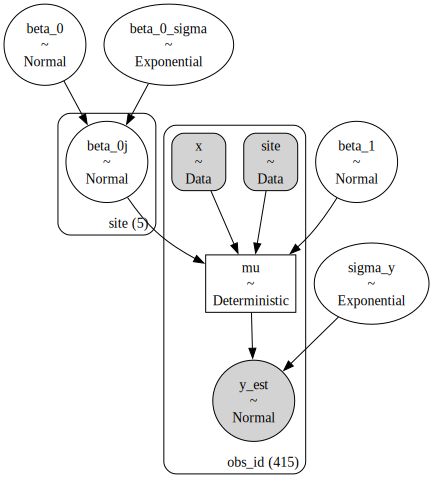

In [12]:
pm.model_to_graphviz(var_inter_model)

### 先验预测检查

In [13]:
var_inter_prior = pm.sample_prior_predictive(samples=500,
                                            model=var_inter_model,
                                            random_seed=84735)

Sampling: [beta_0, beta_0_sigma, beta_0j, beta_1, sigma_y, y_est]


In [14]:
# 定义绘制先验预测回归线的函数，其逻辑与绘制后验预测回归线相同
def plot_prior(prior,group_index):
    # 定义画布，根据站点数量定义画布的列数
    fig, ax = plt.subplots(1,len(df_first5["Site"].unique()), 
                        sharex=True,
                        sharey=True,
                        figsize=(20,5))
    # 根据站点数来分别绘图
    # 我们需要的数据有原始数据中的自变量，每一个因变量的先验预测均值
    # 这些数据都储存在先验预测采样结果中，也就是这里所用的prior
    for i, group in enumerate(df_first5["Site"].unique()): 
        #绘制回归线
        ax[i].plot(prior.constant_data["x"].sel(obs_id = group_index[f"{group}"]),
                prior.prior["mu"].sel(obs_id = group_index[f"{group}"]).stack(sample=("chain","draw")),
                c='gray',
                alpha=0.5)
        ax[i].set_title(f"{group}")
    fig.text(0.5, 0, 'Stress', ha='center', va='center', fontsize=12)
    # 生成纵坐标名称
    fig.text(0.08, 0.5, 'Self control', ha='center', va='center', rotation='vertical', fontsize=12)
    # 生成标题
    plt.suptitle("Prior regression models", fontsize=15, y=1)
        
    sns.despine()

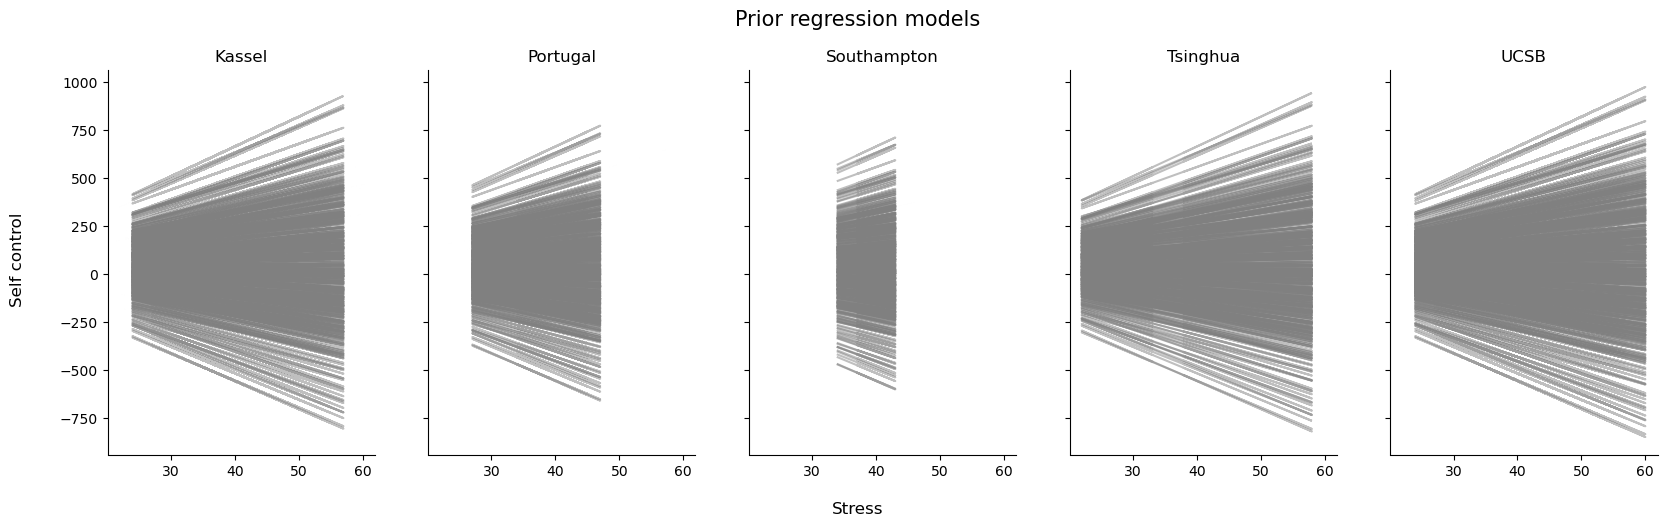

In [15]:
plot_prior(prior=var_inter_prior,
           group_index=first5_index)

###  MCMC采样&后验参数估计  

* 可以看到5条回归线的斜率都是一致的 $\beta_1 = -0.56$  
* 总体层面的解决 $\beta_0 = 63.15$  
* 但截距$\beta_{0j}$[xx]有所不同:  
    * $\beta_{0}$[Kassel] = 63.52  
    * $\beta_{0}$[Portugal] = 65.34
    * $\beta_{0}$[Southampton] = 62.52 
    * $\beta_{0}$[Tsinghua] = 62.04 
    * $\beta_{0}$[UCSB] = 62.32

In [16]:
# ~ 和filter_vars="like" 表示在显示结果时去除掉包含这些字符的变量
var_inter_para = az.summary(var_inter_trace,
           var_names=["~mu","~_sigma","~_offset","~sigma_"],
           filter_vars="like")
var_inter_para

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_0,63.110,2.123,59.329,67.318,0.036,0.025,3506.0,5795.0,1.0
beta_1,-0.562,0.048,-0.651,-0.473,0.001,0.001,3315.0,5061.0,1.0
beta_0j[Kassel],63.523,1.980,59.695,67.135,0.034,0.024,3428.0,5463.0,1.0
beta_0j[Portugal],65.340,2.303,61.054,69.751,0.037,0.026,3897.0,5835.0,1.0
beta_0j[Southampton],62.527,2.469,57.794,67.065,0.039,0.028,3947.0,6518.0,1.0
beta_0j[Tsinghua],62.042,1.984,58.314,65.768,0.034,0.024,3332.0,5649.0,1.0
beta_0j[UCSB],62.328,2.074,58.671,66.483,0.036,0.025,3402.0,5938.0,1.0


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

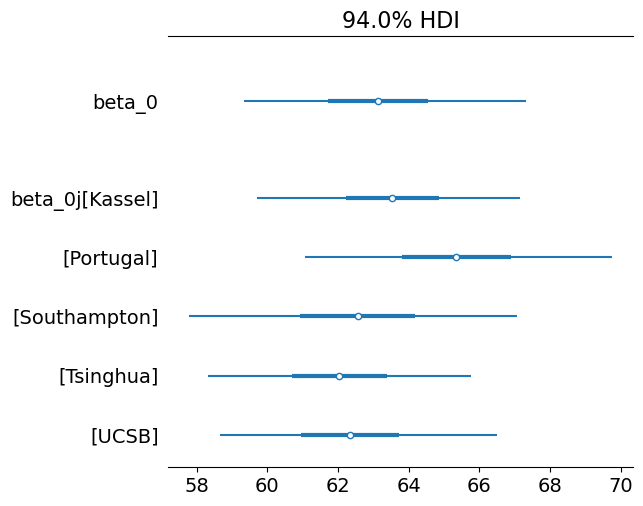

In [17]:
az.plot_forest(var_inter_trace,
           var_names=["~mu", "~sigma", "~offset", "~beta_1"],
           filter_vars="like",
           combined = True)

### 后验预测回归线  

* 5条回归线的截距不同，斜率相同

In [18]:
#定义函数，绘制不同站点下的后验预测回归线
def plot_partial_regression(data, trace, group_index):
    # 定义画布，根据站点数量定义画布的列数
    fig, ax = plt.subplots(1,len(data["Site"].unique()), 
                       sharex=True,
                       sharey=True,
                       figsize=(15,5))
    
    # 根据站点数来分别绘图
    # 我们需要的数据有原始数据，每一个因变量的后验预测均值
    # 这些数据都储存在后验参数采样结果中，也就是这里所用的trace
    for i, group in enumerate(data["Site"].unique()):
        #绘制真实数据的散点图
        x = trace.constant_data.x.sel(obs_id = group_index[f"{group}"])
        y = trace.observed_data.y_est.sel(obs_id = group_index[f"{group}"])
        mu = trace.posterior.mu.sel(obs_id = group_index[f"{group}"])
        ax[i].scatter(x, y,
                color=f"C{i}",
                alpha=0.5)
        #绘制回归线
        ax[i].plot(x, mu.stack(sample=("chain","draw")).mean(dim="sample"),
                color=f"C{i}",
                alpha=0.5)
        ax[i].set_title(f"Intercept: {var_inter_para.loc[f'beta_0j[{group}]']['mean']}", fontsize=12)
        #绘制预测值95%HDI
        az.plot_hdi(
            x, mu,
            hdi_prob=0.95,
            fill_kwargs={"alpha": 0.25, "linewidth": 0},
            color=f"C{i}",
            ax=ax[i])
        
    # 生成横坐标名称
    fig.text(0.5, 0, 'Stress', ha='center', va='center', fontsize=12)
    # 生成纵坐标名称
    fig.text(0.08, 0.5, 'Self control', ha='center', va='center', rotation='vertical', fontsize=12)
    # 生成标题
    plt.suptitle("Posterior regression models(varing intercept)", fontsize=15, y=1.05)
        
    sns.despine()

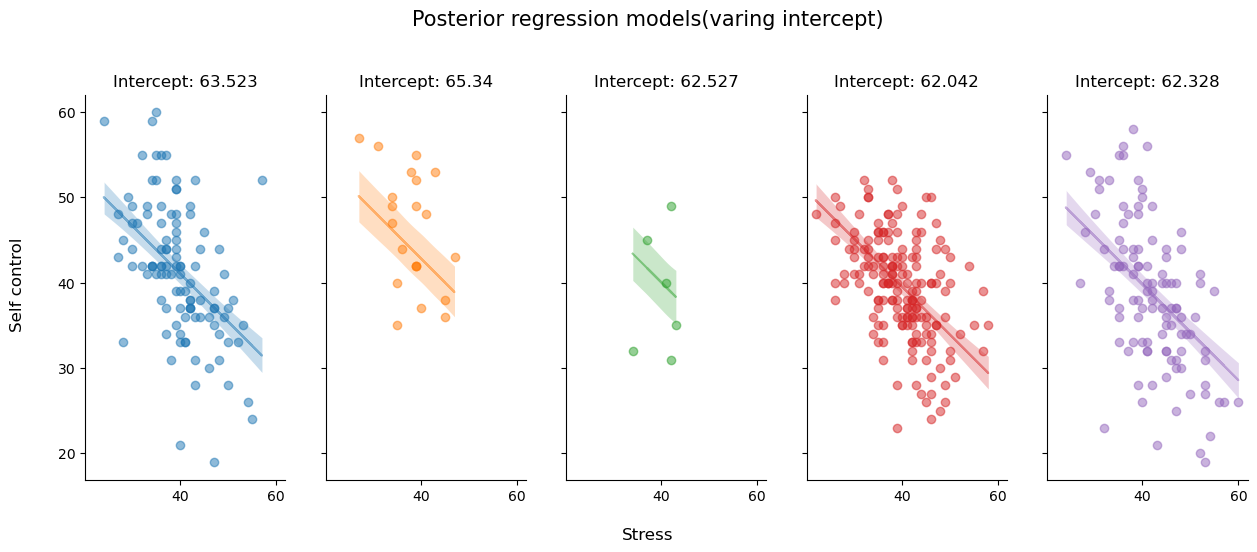

In [19]:
plot_partial_regression(data=df_first5,
                trace=var_inter_trace,
                group_index=first5_index)

### 组间方差与组内方差  

* 在这个模型定义中，组间方差来自`beta_0_offset`，组内方差来自`sigma_y`  
* 结果发现：组间变异 (0.028) 小于组内变异 (0.971)，表明组内相关性低。

In [20]:
def calculate_var_odds(trace):
    # 提取组间和组内变异
    para_sum = az.summary(trace,
                        var_names=["mu","sigma_"],
                        filter_vars="like",
                        kind="stats"
                        )
    individual_par = para_sum.filter(like='mu', axis=0)["mean"]
    # 计算组间方差
    individual_par - individual_par.mean()
    normal_par = (individual_par - individual_par.mean()) / individual_par.std()
    tmp_df = df_first5.copy()
    tmp_df["mu"] = normal_par.values
    group_par = tmp_df.groupby("site_idx").mu.mean()
    between_sd = (group_par**2).sum()
    # 计算组内方差
    within_sd = para_sum.loc['sigma_y','mean']**2
    # 计算变异占比
    var = between_sd + within_sd
    print("被组间方差所解释的部分：", between_sd/var)
    print("被组内方差所解释的部分：", within_sd/var)
    print("组内相关：",between_sd/var)

calculate_var_odds(var_inter_trace)

被组间方差所解释的部分： 0.028661409760697212
被组内方差所解释的部分： 0.9713385902393027
组内相关： 0.028661409760697212


## Model2: Hierarchical model with varying slopes  

* 上一个模型考虑了回归截距随站点的变化，在模型2中，可假设不同站点间的回归截距保持不变，但回归斜率随站点变化。  

$$  
\beta_{1j} | \beta_1, \sigma_1 \sim N(\beta_1, \sigma_1^2)  
$$  

类似于模型1，**模型2的定义形式为：**  

**prior**

$$  
\begin{array}{rll} 
\beta_{0}  & \sim N(0, 50^2) & \\  
\beta_1  & \sim N(0, 5^2) & \\  
\sigma_y & \sim \text{Exp}(1)    & \\  
\sigma_1 & \sim \text{Exp}(1)    & \\  
\end{array}  
$$  

**likelihood**

$$  
\begin{array}{rll}
\beta_{1j} | \beta_1, \sigma_1  & \stackrel{ind}{\sim} N(\beta_1, \sigma_1^2)  & \text{Layer 2: 全局水平（表示斜率在站点间的变化）} \\  
Y_{ij} | \beta_{0j}, \beta_1, \sigma_y & \sim N(\mu_{ij}, \sigma_y^2) \;\; \text{ with } \;\;  \mu_{ij} = \beta_{0j} + \beta_1 X_{ij}& \text{Layer 1: 被试水平（表示每个站点内的线性模型）} \\  
\end{array}  
$$


In [21]:
# 定义函数来构建和采样模型
def run_var_slope_model():

    #定义数据坐标，包括站点和观测索引
    coords = {"site": df_first5["Site"].unique(),
            "obs_id": df_first5.obs_id}

    with pm.Model(coords=coords) as model:
        #定义全局参数
        beta_0 = pm.Normal("beta_0", mu=0, sigma=50)     # HCP: 变量命名需要修改
        beta_1 = pm.Normal("beta_1", mu=0, sigma=5) 
        beta_1_sigma = pm.Exponential("beta_1_sigma", 1)
        sigma_y = pm.Exponential("sigma_y", 1) 

        #传入自变量、获得观测值对应的站点映射
        x = pm.MutableData("x", df_first5.stress, dims="obs_id")
        site = pm.MutableData("site", df_first5.site_idx, dims="obs_id") 

        #模型定义
        beta_1j = pm.Normal("beta_1j", mu=beta_1, sigma=beta_1_sigma, dims="site")

        #线性关系
        mu = pm.Deterministic("mu", beta_0+beta_1j[site]*x, dims="obs_id")

        # 定义 likelihood
        likelihood = pm.Normal("y_est", mu=mu, sigma=sigma_y, observed=df_first5.scontrol, dims="obs_id")

        var_slope_trace = pm.sample(draws=5000,           # 使用mcmc方法进行采样，draws为采样次数
                            tune=1000,                    # tune为调整采样策略的次数，可以决定这些结果是否要被保留
                            chains=4,                     # 链数
                            discard_tuned_samples= True,  # tune的结果将在采样结束后被丢弃
                            random_seed=84735,
                            target_accept=0.99)
    
    return model, var_slope_trace

In [23]:
# 注意，以下代码可能运行5分钟左右

var_slope_model, var_slope_trace = run_var_slope_model()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, beta_1, beta_1_sigma, sigma_y, beta_1j]


Output()

Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 18 seconds.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.


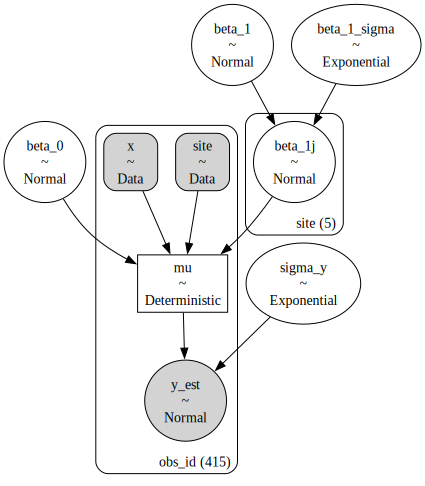

In [24]:
pm.model_to_graphviz(var_slope_model)

###  MCMC采样&后验参数估计  

* 可以看到5条回归线的截距 $\beta_{0j}$ 一致，但是斜率$\beta_{1j}$ 不同  
* $\beta_{1j}$ 在总体$\beta_{1}$ 上增加了变异

In [25]:
var_slope_para = az.summary(var_slope_trace,
                            var_names=["beta_0","beta_1j"],
                            filter_vars="like")
var_slope_para 

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_0,62.519,1.944,58.864,66.186,0.032,0.023,3616.0,5361.0,1.0
beta_1j[Kassel],-0.537,0.050,-0.630,-0.441,0.001,0.001,3784.0,5843.0,1.0
beta_1j[Portugal],-0.467,0.065,-0.590,-0.347,0.001,0.001,4125.0,6209.0,1.0
beta_1j[Southampton],-0.569,0.068,-0.700,-0.445,0.001,0.001,4857.0,8072.0,1.0
beta_1j[Tsinghua],-0.572,0.049,-0.665,-0.483,0.001,0.001,3732.0,5724.0,1.0
beta_1j[UCSB],-0.573,0.047,-0.660,-0.481,0.001,0.001,3827.0,5871.0,1.0


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

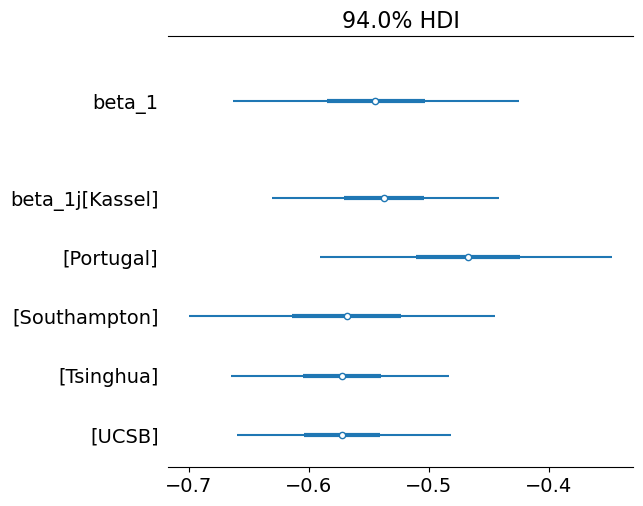

In [26]:
az.plot_forest(var_slope_trace,
           var_names=["~mu", "~sigma", "~offset", "~beta_0"],
           filter_vars="like",
           combined = True)

### 后验预测回归线  

* 5条回归线的截距相同，但是斜率不同

In [27]:
#定义函数，绘制不同站点下的后验预测回归线
def plot_partial_regression(data, trace, group_index):
    # 定义画布，根据站点数量定义画布的列数
    fig, ax = plt.subplots(1,len(data["Site"].unique()), 
                       sharex=True,
                       sharey=True,
                       figsize=(15,5))
    
    # 根据站点数来分别绘图
    # 我们需要的数据有原始数据，每一个因变量的后验预测均值
    # 这些数据都储存在后验参数采样结果中，也就是这里所用的trace
    for i, group in enumerate(data["Site"].unique()):
        #绘制真实数据的散点图
        x = trace.constant_data.x.sel(obs_id = group_index[f"{group}"])
        y = trace.observed_data.y_est.sel(obs_id = group_index[f"{group}"])
        mu = trace.posterior.mu.sel(obs_id = group_index[f"{group}"])
        ax[i].scatter(x, y,
                color=f"C{i}",
                alpha=0.5)
        #绘制回归线
        ax[i].plot(x, mu.stack(sample=("chain","draw")).mean(dim="sample"),
                color=f"C{i}",
                alpha=0.5)
        ax[i].set_title(f"Slope: {var_slope_para.loc[f'beta_1j[{group}]']['mean']}", fontsize=12)
        #绘制预测值95%HDI
        az.plot_hdi(
            x, mu,
            hdi_prob=0.95,
            fill_kwargs={"alpha": 0.25, "linewidth": 0},
            color=f"C{i}",
            ax=ax[i])
        
    # 生成横坐标名称
    fig.text(0.5, 0, 'Stress', ha='center', va='center', fontsize=12)
    # 生成纵坐标名称
    fig.text(0.08, 0.5, 'Self control', ha='center', va='center', rotation='vertical', fontsize=12)
    # 生成标题
    plt.suptitle("Posterior regression models(varing slope)", fontsize=15, y=1.05)
        
    sns.despine()

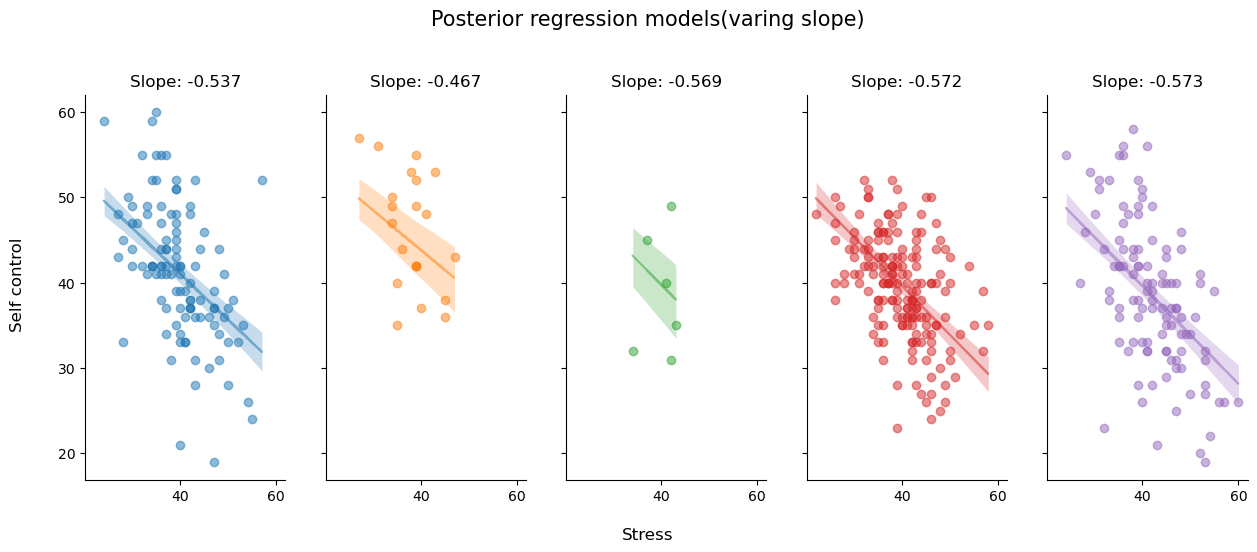

In [28]:
plot_partial_regression(data=df_first5,
                trace=var_slope_trace,
                group_index=first5_index)

### 组间方差与组内方差  

* 在这个模型定义中，组间方差来自`beta_1_offset`，组内方差来自`sigma_y`

In [29]:
# 提取组间和组内变异
calculate_var_odds(var_slope_trace)

被组间方差所解释的部分： 0.03875932652835885
被组内方差所解释的部分： 0.9612406734716412
组内相关： 0.03875932652835885


## Model3: Hierarchical model with varying intercepts & slopes  

模型1 和模型2分别考虑了截距和斜率随着站点的变化，在模型3中我们将同时考虑截距和斜率在不同站点间的差异  

$$  
\beta_{0j} | \beta_0, \sigma_0 \sim N(\beta_0, \sigma_0^2)  
\;\;\;\; \text{ and } \;\;\;\;  
\beta_{1j} | \beta_1, \sigma_1 \sim N(\beta_1, \sigma_1^2)  
$$  

**总结模型定义：**  

**prior**

$$  
\begin{array}{rll} 
\mu_{beta_1}  & \sim N(0, 5^2) & \\  
\sigma_0 & \sim \text{Exp}(1)    & \\  
\sigma_1 & \sim \text{Exp}(1)    & \\  
\sigma_y & \sim \text{Exp}(1)   & \\  
\end{array}  
$$ 

**likelihood**

$$  
\begin{array}{rll}
\beta_{0j} | \beta_0, \sigma_0  & \stackrel{ind}{\sim} N(\mu_{beta_0}, \sigma_0^2) & \text{Layer 2: 全局水平（表示截距在站点间的变化）} \\ 
\beta_{1j} | \beta_1, \sigma_1  & \stackrel{ind}{\sim} N(\mu_{beta_1}, \sigma_1^2)  & \text{Layer 2: 全局水平（表示斜率在站点间的变化）} \\  
Y_{ij} | \beta_{0j}, \beta_1, \sigma_y & \sim N(\mu_{ij}, \sigma_y^2) \;\; \text{ with } \;\;  \mu_{ij} = \beta_{0j} + \beta_1 X_{ij}& \text{Layer 1: 被试水平（表示每个站点内的线性模型）} \\  
\end{array}  
$$


**分层模型与非池化模型的对比**  

|     | 分层模型                                                        | 非池化模型                                                       |
| --- | ----------------------------------------------------------- | ----------------------------------------------------------- |
| 相同  | $Y_{ij} \sim N(\beta_{0j} + \beta_{1j} X_{ij}, \sigma_y^2)$ | $Y_{ij} \sim N(\beta_{0j} + \beta_{1j} X_{ij}, \sigma_y^2)$ |
| 不同  | $\beta_{0j} \stackrel{ind}{\sim} N(\beta_0, \sigma_0^2)$    | $\beta_{0j} \stackrel{ind}{\sim} N(0, 50^2)$                |
|     | $\beta_{1j} \stackrel{ind}{\sim} N(\beta_1, \sigma_1^2)$    | $\beta_{1j} \stackrel{ind}{\sim} N(0, 5^2)$                 |
|     | $\beta_{0} \sim N(0, 50^2)$                                 | $\sigma_y \sim \text{Exp}(1)$                               |
|     | $\beta_1 \sim N(0, 5^2)$                                    |                                                             |
|     | $\sigma_0 \sim \text{Exp}(1)$                               |                                                             |
|     | $\sigma_1 \sim \text{Exp}(1)$                               |                                                             |
|     | $\sigma_y \sim \text{Exp}(1)$                               |                                                             |

* 在非池化模型中，我们认为截距、斜率和变异在不同站点间是不同的；  
* 但在层级模型中，我们额外考虑了来自总体的的信息，即不同站点间的斜率/截距是从全局参数的斜率/截距中抽样的。  
	* 注意，在层级模型中一般不会假设*变异会随着分组变量变化*，这也是分层模型和非池化模型的重要区别。  


In [30]:
# 定义函数来构建和采样模型
def run_var_both_model():

    #定义数据坐标，包括站点和观测索引
    coords = {"site": df_first5["Site"].unique(),
            "obs_id": df_first5.obs_id}

    with pm.Model(coords=coords) as model:
        #定义全局参数
        mu_beta0 = pm.Normal("beta_0", mu=0, sigma=50)     # HCP: 变量名
        beta_0_sigma = pm.Exponential("beta_0_sigma", 1)
        mu_beta1 = pm.Normal("beta_1", mu=0, sigma=5) 
        beta_1_sigma = pm.Exponential("beta_1_sigma", 1)
        sigma_y = pm.Exponential("sigma_y", 1) 

        #传入自变量、获得观测值对应的站点映射
        x = pm.MutableData("x", df_first5.stress, dims="obs_id")
        site = pm.MutableData("site", df_first5.site_idx, dims="obs_id") 

        #模型定义
        beta_0j = pm.Normal("beta_0j", mu=beta_0, sigma=beta_0_sigma, dims="site")
        beta_1j = pm.Normal("beta_1j", mu=beta_1, sigma=beta_1_sigma, dims="site")

        #线性关系
        mu = pm.Deterministic("mu", beta_0j[site]+beta_1j[site]*x, dims="obs_id")

        # 定义 likelihood
        likelihood = pm.Normal("y_est", mu=mu, sigma=sigma_y, observed=df_first5.scontrol, dims="obs_id")

        var_both_trace  = pm.sample(draws=5000,           # 使用mcmc方法进行采样，draws为采样次数
                            tune=1000,                    # tune为调整采样策略的次数，可以决定这些结果是否要被保留
                            chains=4,                     # 链数
                            discard_tuned_samples= True,  # tune的结果将在采样结束后被丢弃
                            random_seed=84735,
                            target_accept=0.99)
    
    return model, var_both_trace 

In [31]:
# 注意，以下代码可能运行10分钟左右

var_both_model, var_both_trace = run_var_both_model()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, beta_0_sigma, beta_1, beta_1_sigma, sigma_y, beta_0j, beta_1j]


Output()

Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 174 seconds.
There were 99 divergences after tuning. Increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


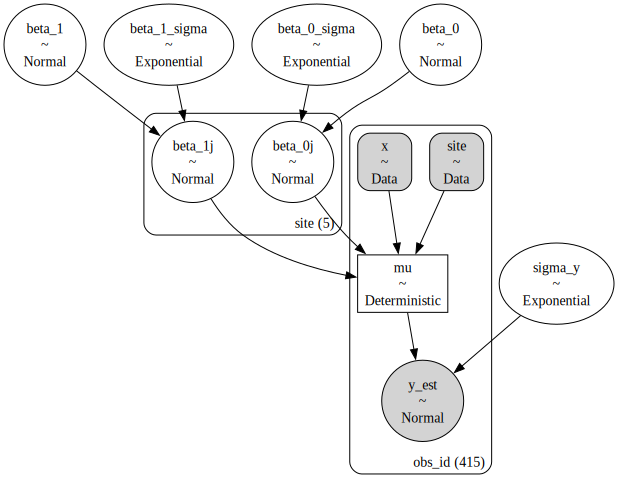

In [32]:
pm.model_to_graphviz(var_both_model)

###  MCMC采样&后验参数估计  

* 可以看到5条回归线的斜率$\beta_{1j}$、截距$\beta_{0j}$都是不同的  
* $\beta_{1j}$、$\beta_{0j}$是在总体$\beta_{1}$、$\beta_{0}$上增加了一些变异

In [33]:
var_both_para = az.summary(var_both_trace,
                            var_names=["beta_0j","beta_1j"],
                            filter_vars="like")
var_both_para

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_0j[Kassel],63.196,2.214,59.054,67.355,0.043,0.030,2643.0,4739.0,1.0
beta_0j[Portugal],63.854,2.647,59.007,68.906,0.050,0.035,2805.0,4760.0,1.0
beta_0j[Southampton],62.515,2.482,57.847,67.215,0.044,0.031,3188.0,5601.0,1.0
beta_0j[Tsinghua],61.768,2.222,57.606,65.909,0.043,0.031,2620.0,4654.0,1.0
beta_0j[UCSB],63.025,2.258,58.729,67.215,0.042,0.030,2794.0,4795.0,1.0
beta_1j[Kassel],-0.553,0.056,-0.659,-0.449,0.001,0.001,2711.0,5144.0,1.0
beta_1j[Portugal],-0.497,0.075,-0.640,-0.358,0.001,0.001,2633.0,5291.0,1.0
beta_1j[Southampton],-0.570,0.070,-0.702,-0.440,0.001,0.001,3965.0,6183.0,1.0
beta_1j[Tsinghua],-0.555,0.055,-0.658,-0.452,0.001,0.001,2684.0,4545.0,1.0
beta_1j[UCSB],-0.584,0.054,-0.688,-0.485,0.001,0.001,2823.0,4848.0,1.0


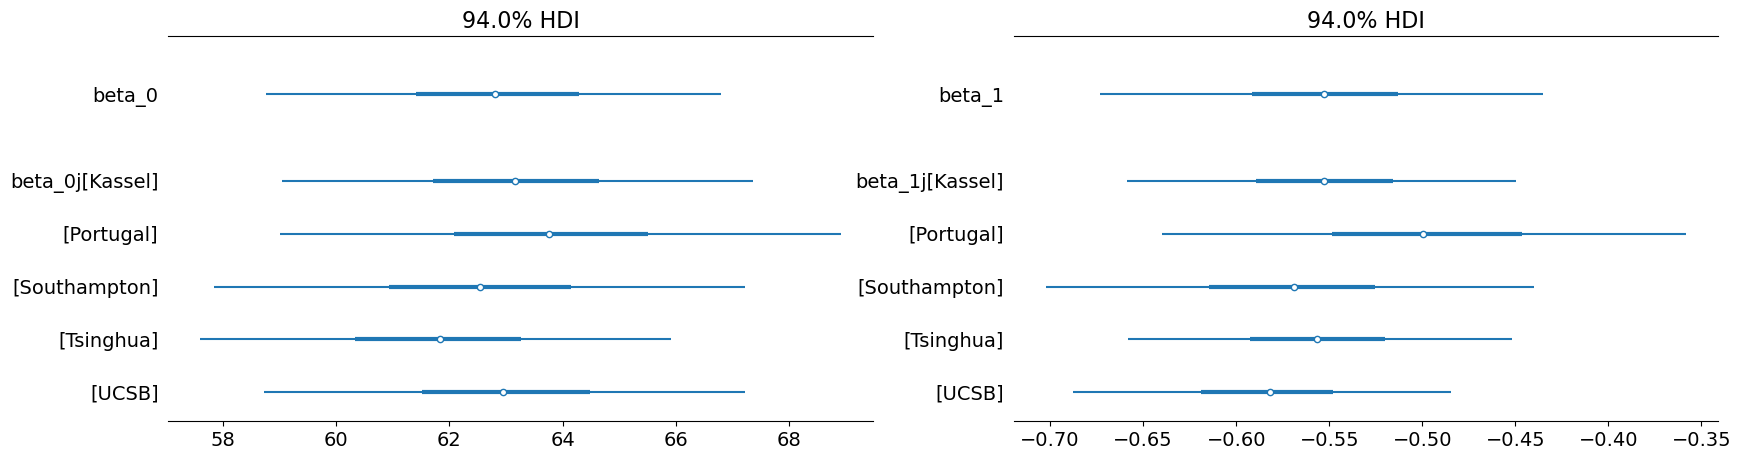

In [34]:
# 设置绘图坐标
figs, (ax1, ax2) = plt.subplots(1,2, figsize = (20,5))
# 绘制变化的截距
az.plot_forest(var_both_trace,
           var_names=["~mu", "~sigma", "~offset", "~beta_1"],
           filter_vars="like",
           combined = True,
           ax=ax1)
# 绘制变化的斜率
az.plot_forest(var_both_trace,
           var_names=["~mu", "~sigma", "~offset", "~beta_0"],
           filter_vars="like",
           combined = True,
           ax=ax2)
plt.show()

### 后验预测回归线  
* 5条回归线的截距、斜率都是不同的

In [35]:
#定义函数，绘制不同站点下的后验预测回归线
def plot_partial_regression(data, trace, group_index):
    # 定义画布，根据站点数量定义画布的列数
    fig, ax = plt.subplots(1,len(data["Site"].unique()), 
                       sharex=True,
                       sharey=True,
                       figsize=(15,5))
    
    # 根据站点数来分别绘图
    # 我们需要的数据有原始数据，每一个因变量的后验预测均值
    # 这些数据都储存在后验参数采样结果中，也就是这里所用的trace
    for i, group in enumerate(data["Site"].unique()):
        #绘制真实数据的散点图
        x = trace.constant_data.x.sel(obs_id = group_index[f"{group}"])
        y = trace.observed_data.y_est.sel(obs_id = group_index[f"{group}"])
        mu = trace.posterior.mu.sel(obs_id = group_index[f"{group}"])
        ax[i].scatter(x, y,
                color=f"C{i}",
                alpha=0.5)
        #绘制回归线
        ax[i].plot(x, mu.stack(sample=("chain","draw")).mean(dim="sample"),
                color=f"C{i}",
                alpha=0.5)
        ax[i].set_title(f"Slope: {var_both_para.loc[f'beta_1j[{group}]']['mean']}\nIntercept: {var_both_para.loc[f'beta_0j[{group}]']['mean']}", 
        fontsize=12)
        #绘制预测值95%HDI
        az.plot_hdi(
            x, mu,
            hdi_prob=0.95,
            fill_kwargs={"alpha": 0.25, "linewidth": 0},
            color=f"C{i}",
            ax=ax[i])
        
    # 生成横坐标名称
    fig.text(0.5, 0, 'Stress', ha='center', va='center', fontsize=12)
    # 生成纵坐标名称
    fig.text(0.08, 0.5, 'Self control', ha='center', va='center', rotation='vertical', fontsize=12)
    # 生成标题
    plt.suptitle("Posterior regression models(varing slope and intercept)", fontsize=15, y=1.05)
        
    sns.despine()


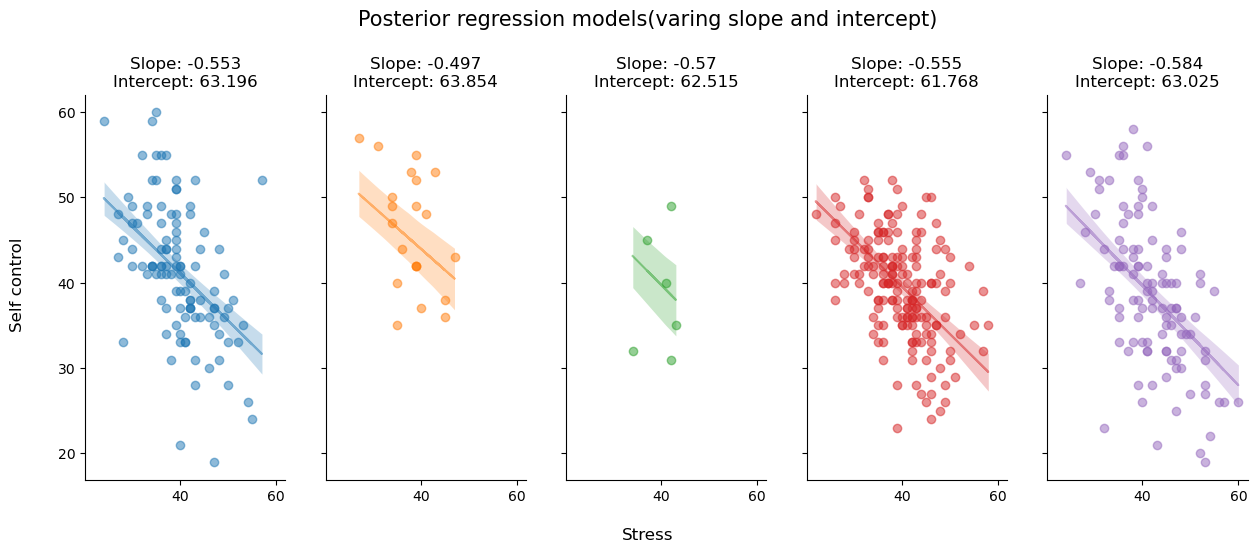

In [36]:
plot_partial_regression(data=df_first5,
                trace=var_both_trace,
                group_index=first5_index)

### 组间方差与组内方差  

* 在这个模型定义中，组间方差来自`beta_0_offset`、`beta_1_offset`，组内方差来自`sigma_y`

In [37]:
# 提取组间和组内变异
calculate_var_odds(var_both_trace)

被组间方差所解释的部分： 0.04137910554592596
被组内方差所解释的部分： 0.9586208944540742
组内相关： 0.04137910554592596


## 小结

现在，我们可以看到在三种不同情况下的部分池化模型的后验预测回归线。  

可以发现三个模型之间存在差异，我们可以对其模型进行评估。  


<div align="center">  
  <img src="https://cdn.kesci.com/upload/soo4ix6oj8.png?imageView2/0/w/700" alt="Image">  
</div>  

<div style="padding-bottom: 60px;"></div>

## 评估后验预测  

* 在之前的课程中，我们介绍过对后验预测结果进行评估的两种方法  

* 一是**MAE**，即后验预测值与真实值之间预测误差的中位数，二是**within_95**，即真实值是否落在95%后验预测区间内  

* 在这里我们调用之前写过的计算两种指标的方法，评估四个模型的后验预测结果

In [38]:
# 进行后验预测
complete_ppc = pm.sample_posterior_predictive(complete_trace, 
                                            model = complete_pooled_model,
                                            random_seed=84735)
var_inter_ppc = pm.sample_posterior_predictive(var_inter_trace,
                                                model = var_inter_model,
                                                random_seed=84735)
var_slope_ppc = pm.sample_posterior_predictive(var_slope_trace,
                                                model = var_slope_model,
                                                random_seed=84735)                                                                                       
var_both_ppc = pm.sample_posterior_predictive(var_both_trace, 
                                            model = var_both_model,
                                            random_seed=84735)

Sampling: [y_est]


Output()

Sampling: [beta_0j, y_est]


Output()

Sampling: [beta_1j, y_est]


Output()

Sampling: [beta_0j, beta_1j, y_est]


Output()

### 绝对指标：MAE (Median Absolute Error)

In [39]:
# 定义计算 MAE 函数
from statistics import median
def MAE(model_ppc):
    # 计算每个X取值下对应的后验预测模型的均值
    pre_x = model_ppc.posterior_predictive["y_est"].stack(sample=("chain", "draw"))
    pre_y_mean = pre_x.mean(axis=1).values

    # 提取观测值Y，提取对应Y值下的后验预测模型的均值
    MAE = pd.DataFrame({
        "scontrol_ppc_mean": pre_y_mean,
        "scontrol_original": model_ppc.observed_data.y_est.values
    })

    # 计算预测误差
    MAE["pre_error"] = abs(MAE["scontrol_original"] -\
                            MAE["scontrol_ppc_mean"])

    # 最后，计算预测误差的中位数
    MAE = median(MAE.pre_error)
    return MAE


In [40]:
# 定义
def counter_outlier(model_ppc, hdi_prob=0.95):
    # 将az.summary生成的结果存到hdi_multi这个变量中，该变量为数据框
    hdi = az.summary(model_ppc, kind="stats", hdi_prob=hdi_prob)
    lower = hdi.iloc[:,2].values
    upper = hdi.iloc[:,3].values

    # 将原数据中的自我控制分数合并，便于后续进行判断
    y_obs = model_ppc.observed_data["y_est"].values

    # 判断原数据中的压力分数是否在后验预测的95%可信区间内，并计数
    hdi["verify"] = (y_obs <= lower) | (y_obs >= upper)
    hdi["y_obs"] = y_obs
    hdi_num = sum(hdi["verify"])

    return hdi_num

In [41]:
# 将每个模型的PPC储存为列表
ppc_samples_list = [var_inter_ppc, var_slope_ppc, var_both_ppc]
model_names = ["变化截距", "变化斜率", "变化截距、斜率"]

# 建立一个空列表来存储结果
results_list = []

# 遍历模型并计算MAE和超出95%hdi的值
for model_name, ppc_samples in zip(model_names, ppc_samples_list):
    outliers = counter_outlier(ppc_samples)
    MAEs = MAE(ppc_samples)
    results_list.append({'Model': model_name, 'MAE':MAEs, 'Outliers': outliers})

# 从结果列表创建一个DataFrame
results_df = pd.DataFrame(results_list)

results_df

,Model,MAE,Outliers
0,变化截距,3.992812,18
1,变化斜率,4.064203,11
2,变化截距、斜率,4.059160,11


### 相对指标：ELPD-LOO

从模型比较的结果，我们可以发现：  
* 同时包含变化截距和变化斜率的模型(model3)是最优模型，对应了我们的假设3（H3）。  
* 此外，所有模型的 elpd 都非常接近 (考虑到 se大于为15~16)，因此，模型比较的结果只能作为参考，更重要的是通过后验预测检验模型的性能。  

模型假设：  
* H0(model 0)，普通线性模型，仅考虑压力对自我控制的影响。  
* H1(model 1)，变化截距模型，在模型0的基础上考虑自我控制在不同站点的变化。  
* H2(model 2)，变化斜率模型，在模型0的基础上不同站点间的压力影响的变化。  
* H3(model 3)，变化截距和斜率模型，结合模型1和模型2，同时考虑站点对自我控制以及压力影响的变化。

In [42]:
pm.compute_log_likelihood(var_inter_trace, model=var_inter_model)
pm.compute_log_likelihood(var_slope_trace, model=var_slope_model)
pm.compute_log_likelihood(var_both_trace, model=var_both_model)

Output()

Output()

Output()

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data
	> constant_data

In [43]:
comparison_list = {
    "model1(hierarchical intercept)":var_inter_trace,
    "model2(hierarchical slope)":var_slope_trace,
    "model3(hierarchy both)":var_both_trace,
}
az.compare(comparison_list)

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model3(hierarchy both),0,-1363.345931,7.587824,0.000000,1.000000e+00,16.058403,0.000000,False,log
model1(hierarchical intercept),1,-1364.027136,6.878301,0.681204,1.859624e-15,16.021290,0.884268,False,log
model2(hierarchical slope),2,-1364.188043,7.310207,0.842112,3.330669e-16,15.989506,0.413512,False,log


## 预测新站点的数据  

* 我们可以根据当前的层级模型对新组别的数据进行预测，如"Zurich"站点  

* 在pymc中，只要在`pm.sample_posterior_predictive`中传入模型MCMC后验参数采样结果，即可以在该模型的基础上对新数据生成预测  

* 预测结果储存在`.predictions`中

In [44]:
# 选择站点为"Zurich"的数据
new_group = df_raw[df_raw.Site=="Zurich"]
# 生成被试索引
new_group["obs_id"] = range(len(new_group))
# 生成站点索引
new_group["site_idx"] = pd.factorize(new_group.Site)[0]

In [45]:
new_coords = {"site": new_group["Site"].unique(),
          "obs_id": new_group.obs_id}

with pm.Model(coords=new_coords) as hier_pred:
    #定义全局参数(这部分没有改变)
    beta_0 = pm.Normal("beta_0", mu=40, sigma=20)
    beta_0_sigma = pm.Exponential("beta_0_sigma", 1)
    beta_1 = pm.Normal("beta_1", mu=0, sigma=5) 
    beta_1_sigma = pm.Exponential("beta_1_sigma", 1)
    sigma_y = pm.Exponential("sigma_y", 1) 

    #传入自变量
    x = pm.MutableData("x", new_group.stress, dims="obs_id")
    #获得观测值对应的站点映射
    site = pm.MutableData("site", new_group.site_idx, dims="obs_id") 
    
    #注意：在这里我们需要传入一个新的参数名，因为传入的是一个新站点(除此处外，其余的定义变量名未发生改变)
    new_beta_0_offset = pm.Normal("new_beta_0_offset", 0, sigma=1, dims="site")
    new_beta_0j = pm.Deterministic("new_beta_0j", beta_0 + new_beta_0_offset * beta_0_sigma, dims="site")
    new_beta_1_offset = pm.Normal("new_beta_1_offset", 0, sigma=1, dims="site")
    new_beta_1j = pm.Deterministic("new_beta_1j", beta_1 + new_beta_1_offset * beta_1_sigma, dims="site")
    new_mu = pm.Normal("new_mu",  new_beta_0j[site]+new_beta_1j[site]*x, dims="obs_id")

    #似然
    likelihood = pm.Normal("y_est", mu=new_mu, sigma=sigma_y, observed=new_group.scontrol, dims="obs_id")

    # 进行后验预测估计，注意使用的是上一个模型的后验参数估计，partial_trace
    pred_trace = pm.sample_posterior_predictive(var_both_trace,
                                                var_names=["new_beta_0j","new_beta_1j"],
                                                predictions=True,
                                                extend_inferencedata=True,
                                                random_seed=84735)

Sampling: [new_beta_0_offset, new_beta_1_offset]


Output()

In [46]:
pred_trace

Inference data with groups:
	> posterior
	> predictions
	> log_likelihood
	> sample_stats
	> observed_data
	> constant_data
	> predictions_constant_data

### 组内预测 vs 组外预测  

* 现在，对于原有站点和新站点，通过MCMC采样，我们都得到了对应站点下对斜率和截距的估计  

    * 在原有站点中，斜率和截距的变量名为beta_0j，beta_1j；在新站点中二者的名字则为new_beta_0j，new_beta_1j  

* 假设我们想知道当压力分数为40时，自我控制分数为多少，那么可以根据 $\mu_{ij} = \beta_{0j} + \beta_{1j} \cdot 40$ 对该数据点的观测值做出预测  

* 在MCMC采样中，对于每个站点，都生成了20000对参数估计值，$\left\lbrace \beta_{0j}^{(i)}, \beta_1^{(i)}\right\rbrace$。因此，代入X值后，对于每个站点我们都能获得20000个对应的预测值

In [47]:
#建立空dataframe，储存后验预测的结果
col = df_first5["Site"].unique()
pred_result = pd.DataFrame(columns=col)
#对每一个站点，提取后验参数的结果代入公式计算，并将计算结果存储在数据框的不同列
for site in df_first5["Site"].unique():
    pred = (40 * (var_both_trace.posterior['beta_1j'].sel(site = f"{site}")) +\
    (var_both_trace.posterior['beta_0j'].sel(site = f"{site}"))).stack(sample=("chain","draw")).values
    pred_result[site] = pred

In [48]:
#对于新站点，同样提取对应的参数并代入公式计算，将结果存在新列中
pred_trace = pred_trace.predictions.stack(sample=("chain","draw","site"))
new_group_pred = (40 * (pred_trace['new_beta_1j']) + (pred_trace['new_beta_0j'])).values
pred_result[new_group["Site"].unique()[0]] = new_group_pred 

pred_result

,Kassel,Portugal,Southampton,Tsinghua,UCSB,Zurich
0,41.386959,46.215638,37.816890,38.905278,39.382645,29.219933
1,41.563966,46.003149,39.114566,39.964805,39.179799,36.794005
2,41.529716,46.006681,39.029618,39.831905,39.208642,41.388924
3,41.049921,44.545592,40.827612,39.390817,39.077663,41.656703
4,40.850289,41.736475,39.522514,39.598478,40.092085,42.059911
...,...,...,...,...,...,...
19995,40.269601,42.274643,41.073450,39.555408,39.087087,43.034722
19996,41.873221,44.993634,42.196694,39.443132,39.623072,37.149424
19997,41.361909,42.968131,40.737790,39.068135,39.868652,41.715175
19998,41.322384,45.197960,40.508330,39.182990,40.387703,42.245052


**绘制预测密度分布图**  

* 最后，我们绘制每个站点的预测结果分布  

* 可以看到，数据点较多的站点预测的结果比较集中，数据点较少的站点预测的结果比较分散  

* 新站点的预测结果变异性是最大的

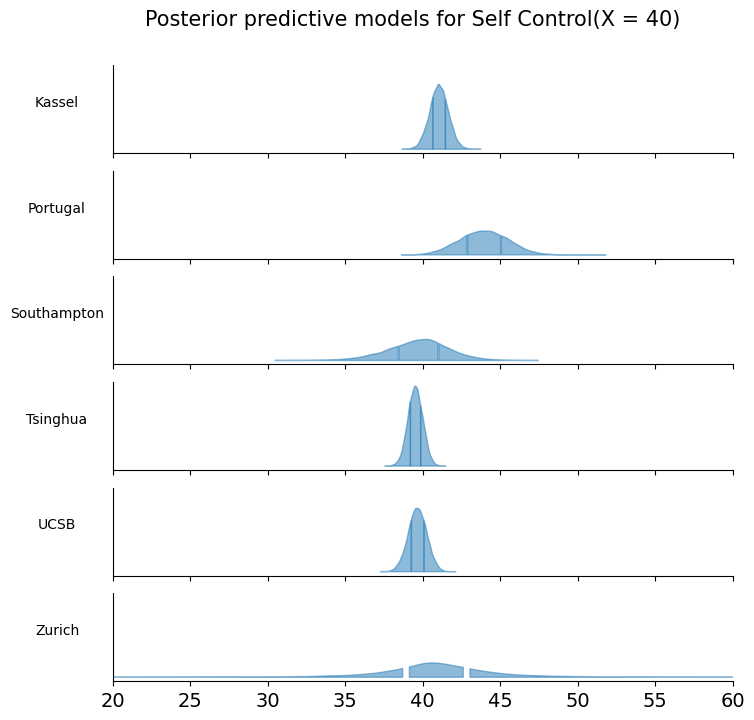

In [49]:
# 根据列数定义画布的行数
fig, ax = plt.subplots(len(pred_result.columns),1, figsize = (8,8),
                       sharex=True,
                       sharey=True)
# 对于每一个站点，绘制其预测结果的密度分布图
for i,site in enumerate(pred_result.columns):
    az.plot_kde(pred_result[site].to_numpy(),
                fill_kwargs={"alpha": 0.5},
                quantiles=[.25, .75],
                ax=ax[i])
    #设置y轴标题和刻度
    ax[i].set_ylabel(f'{site}', rotation=0, labelpad=40)
    ax[i].set_yticks([])
#设置x轴范围
plt.xlim([20,60])
#设置标题
plt.suptitle("Posterior predictive models for Self Control(X = 40)",
             y=0.95,
             fontsize=15)
sns.despine()

## 分层模型中的组层面预测因子(group-level predictors)  

🤔 在上面的例子中，我们考虑了个体压力对于自我控制的影响，并且分不同站点来考虑这一问题。然而，我们是否考虑过不同站点的其他特性对于自我控制的影响呢？  

* 例如，原数据想要探究的核心问题为温度和社会行为的关系，不同站点对应了不同国家和地区，而这些地区的平均气温是否会对自我控制产生影响呢？  

    * 由于该数据的收集时间为夏季，因此我们查阅了每一站点的夏季平均气温，作为组层面的预测变量  

* 组层面预测因子(group-level predictors)是指在组间(站点)层面的特征，这是相对于组内预测因子(group-level predictors)而言的。  
    * 例如，个体压力分数(stress)是组内预测因子。这个值在不同个体间具有不同值。  
    * 而地区的夏季平均温度是组层面预测因子。这些值在不同站点(site)间不同，但是在站点内的个体间保持相同。  

![Image Name](https://cdn.kesci.com/upload/s5wfm7n7r8.png?imageView2/0/w/960/h/960)  

### 构建具有组层面预测因子的分层模型  

* 我们在**变化截距**模型的基础上继续添加  

* 回顾之前的仅包含变化的截距的分层模型：  

**prior**

$$  
\begin{array}{rll}  
\beta_{0}  & \sim N(0, 50^2) & \text{} \\  
\beta_1  & \sim N(0, 5^2) & \\  
\sigma_y & \sim \text{Exp}(1)    & \\  
\sigma_0 & \sim \text{Exp}(1)    & \\  
\end{array} 
$$

**likelihood**
$$  
\begin{array}{rll}
\beta_{0j} | \beta_0, \sigma_0  & \stackrel{ind}{\sim} N(\beta_0, \sigma_0^2) & \text{(Layer2: 站点水平)} \\  
Y_{ij} | \beta_{0j}, \beta_1, \sigma_y & \sim N(\mu_{ij}, \sigma_y^2) \;\; \text{ with } \;\;  \mu_{ij} = \beta_{0j} + \beta_1 X_{ij} & \text{(Layer1: 被试水平)} \\  
\end{array}  
$$  

🤔 如果我们想考虑组层面预测因子，那么该变量该放在哪一层(Layer)？  
* 由于组层面预测因子是组间(站点$j$)层面的特征，因此该变量主要影响截距在站点间的变化。  
* 公式写作： $\beta_{0j} = \gamma_0 + \gamma_1 U_j$  
  * 其中，$U_j$是站点$j$的组层面预测因子  
  * $\gamma_1$是组层面预测因子$U_j$的回归系数；而$\gamma_0$为站点间的变化的截距。  
  * 因此，每个站点的截距 $\beta_{0j}$，受到组层面的预测因子$U_j$的影响。  
* 也可以写作 $\mu_{ij} = \beta_{0j} + \beta_1 X_{ij} = (\gamma_0 + \gamma_1 U_j) + \beta_1 X_{ij}$

In [50]:
#选择需要的变量
df_temp =df_first5[["site_idx","obs_id","Site","stress","scontrol"]].reset_index(drop=True)
levels = df_temp['Site'].unique()

#生成各站点的夏季平均气温
level_mapping = {
    levels[0]: 17.6,
    levels[1]: 24.8,
    levels[2]: 19.9,
    levels[3]: 30.3,
    levels[4]: 19
}

#将气温信息合并到数据框中
df_temp['avetemp'] = df_temp['Site'].map(level_mapping)
df_temp 

,site_idx,obs_id,Site,stress,scontrol,avetemp
0,0,0,Kassel,30,47,17.6
1,0,1,Kassel,30,44,17.6
2,0,2,Kassel,31,47,17.6
3,0,3,Kassel,47,37,17.6
4,0,4,Kassel,50,33,17.6
...,...,...,...,...,...,...
410,4,410,UCSB,48,36,19.0
411,4,411,UCSB,45,32,19.0
412,4,412,UCSB,27,40,19.0
413,4,413,UCSB,46,31,19.0


### 夏季平均气温对自我控制平均分的影响  

    * 由于我们只考虑了5个站点的数据，因此也只有5个数据点

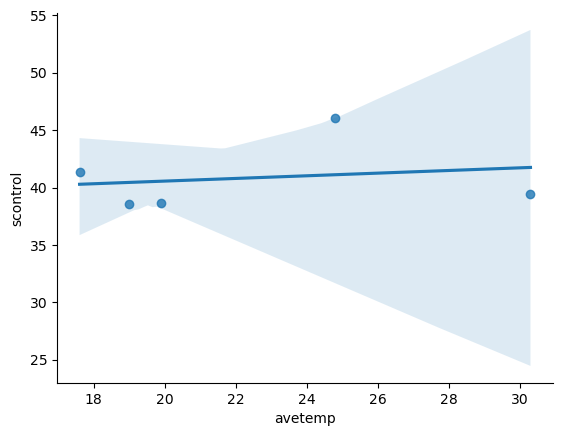

In [51]:
sns.regplot(x="avetemp", y="scontrol", data=df_temp.groupby("Site").mean())
sns.despine()

**总的公式**  

将 $\beta_{0j} = \gamma_0 + \gamma_1 U_j$ 放入之前的公式，并且为新参数$\gamma_0$和$\gamma_1$引入先验分布：  

**prior**  

$$  
\begin{array}{rll}  
\gamma_0  & \sim N(0, 50^2) & \\  
\gamma_1 & \sim N(0, 5^2) & \\  
\beta_1  & \sim N(0, 5^2) & \\  
\sigma_y & \sim \text{Exp}(1)    & \\  
\sigma_0 & \sim \text{Exp}(1)   & \\  
\end{array}  
$$

**likelihood**  

$$  
\begin{array}{rll}
\beta_{0j} | \gamma_0, \gamma_1, \sigma_0  & \stackrel{ind}{\sim} N(\gamma_0 + \gamma_1 U_j, \sigma_0^2) & \text{(Layer2: 站点水平)} \\  
Y_{ij} | \beta_{0j}, \beta_1, \sigma_y & \sim N(\mu_{ij}, \sigma_y^2) \;\; \text{ with } \;\;  \mu_{ij} = \beta_{0j} + \beta_1 X_{ij} & \text{(Layer1: 被试水平)} \\  
\end{array}  
$$





**另一种定义形式**  

* 在此前我们认为$\beta_{0j}= \beta_0 + b_{0j}$，即在共同截距的基础上增加组的变异  

* 但在具有组层面(group-level)预测因子的模型中，实际上截距又会受到组层面的影响  

    * 相当于：$\beta_{0} = \gamma_0 + \gamma_1 U_j$  

    * $\beta_{0j} = \gamma_0 + \gamma_1 U_j + b_{0j}$  

    * 进一步将 $\beta_{0j}$ 放入 $\mu_{ij} = \beta_{0j} + \beta_1 X_{ij}$中:  
    
* $\mu_{ij} = (\gamma_0 + \gamma_1 U_j + b_{0j}) + \beta_1 X_{ij}$  

* 整理有：  

**prior**

$$  
\begin{array}{rll}  
\gamma_0  & \sim N(0, 50^2) & \\  
\gamma_1 & \sim N(0, 5^2) & \\  
\beta_1  & \sim N(0, 5^2) & \\  
\sigma_y & \sim \text{Exp}(1)    & \\  
\sigma_0 & \sim \text{Exp}(1)   & \\  
\end{array}  
$$  

**likelihood**
$$  
\begin{array}{rll}  
b_{0j} | \sigma_0 & \stackrel{ind}{\sim} N(0, \sigma_0^2) & \text{(Layer2: 站点水平)} \\  
Y_{ij} | \beta_{0j}, \beta_1, \sigma_y & \sim N(\mu_{ij}, \sigma_y^2) \;\; \text{ with } \;\;  \mu_{ij} = (\gamma_0 + \gamma_1 U_j + b_{0j}) + \beta_1 X_{ij} & \text{(Layer1: 被试水平)} \\  
\end{array}  
$$  



In [52]:
# 我们采用第二种定义方式

#定义数据坐标，包括站点和观测索引
coords = {"site": df_temp["Site"].unique(),
        "obs_id": df_temp.obs_id}

with pm.Model(coords=coords) as group_pred_model:
    #定义全局参数
    gamma_0 = pm.Normal("gamma_0", mu=0, sigma=50)
    gamma_1 = pm.Normal("gamma_1", mu=0, sigma=5) 
    beta_1 = pm.Normal("beta_1", mu=0, sigma=5) 
    sigma_y = pm.Exponential("sigma_y", 1) 
    sigma_0 = pm.Exponential("sigma_0", 1)

    #传入自变量、获得观测值对应的站点映射
    x = pm.MutableData("x", df_temp.stress, dims="obs_id")
    u = pm.MutableData("u", df_temp.avetemp.unique(), dims="site")
    site_idx = pm.MutableData("site", df_temp.site_idx, dims="obs_id") 

    #定义组层面变量
    beta_0 = pm.Deterministic("beta_0", gamma_0 + gamma_1*u, dims="site")
    beta_0_offset = pm.Normal("beta_0_offset", 0, sigma=1, dims="site")
    beta_0j = pm.Deterministic("beta_0j", beta_0 + sigma_0*beta_0_offset, dims="site")

    #线性关系
    mu = pm.Deterministic("mu", beta_0j[site_idx]+beta_1*x, dims="obs_id")
 
    # 定义 likelihood
    likelihood = pm.Normal("y_est", mu=mu, sigma=sigma_y, observed=df_temp.scontrol, dims="obs_id")

    group_pred_trace = pm.sample(draws=5000,           # 使用mcmc方法进行采样，draws为采样次数
                        tune=1000,                    # tune为调整采样策略的次数，可以决定这些结果是否要被保留
                        chains=4,                     # 链数
                        discard_tuned_samples= True,  # tune的结果将在采样结束后被丢弃
                        random_seed=84735,
                        target_accept=0.99)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gamma_0, gamma_1, beta_1, sigma_y, sigma_0, beta_0_offset]


Output()

Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 59 seconds.


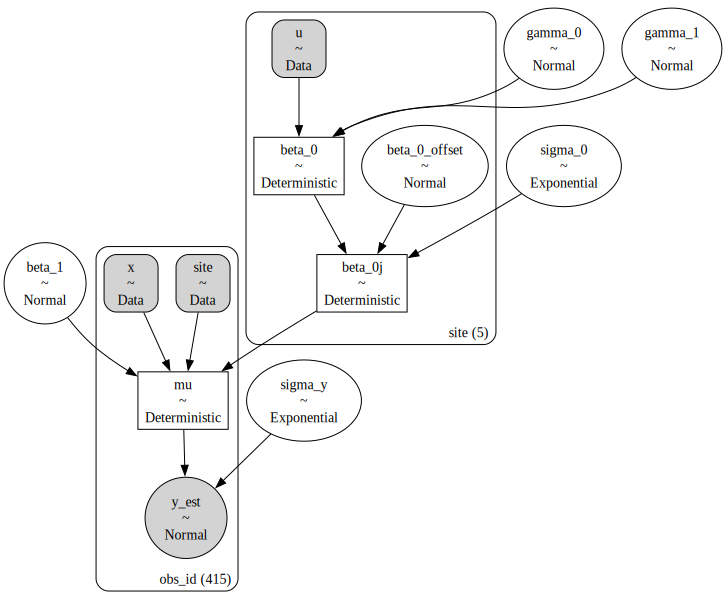

In [53]:
pm.model_to_graphviz(group_pred_model)

### bambi code（补充内容）  

* 当模型变得复杂， 在 PyMC 中定义分层模型将变得困难。  

* 使用 Bambi 可以简化这一过程，其模型定义公式为 `"stress + avetemp + (stress|Site)"`  

    * 只需要在原来层级模型的基础上加入组层面预测因子即可

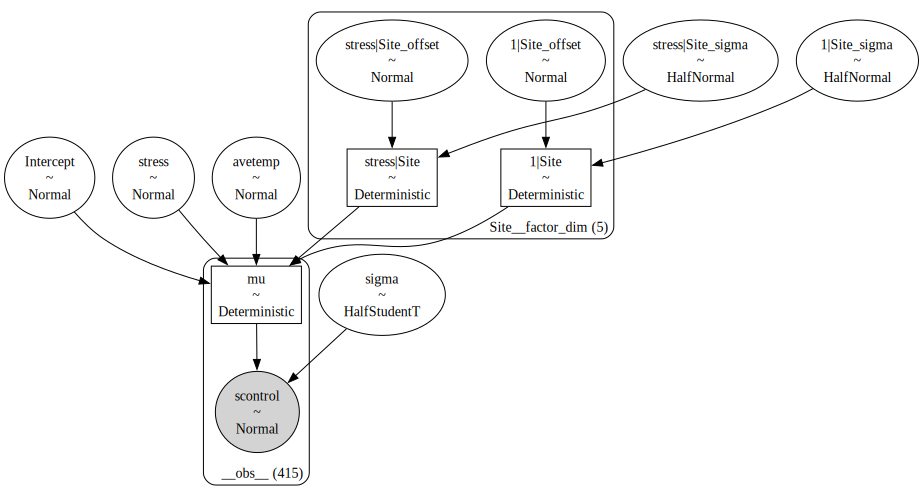

In [54]:
group_pred_bmb = bmb.Model("scontrol ~ stress + avetemp + (stress|Site)",
                      df_temp,
                      categorical="Site")

group_pred_bmb.build()
group_pred_bmb.graph()

####  MCMC采样&后验参数估计  

* 可以看到组层面预测因子(平均最低气温)的回归斜率$\gamma_{1j}$和截距$\gamma_{0j}$

In [55]:
az.summary(group_pred_trace,
           var_names=["gamma_0","gamma_1","beta_0j","beta_1"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
gamma_0,62.902,5.481,52.061,72.534,0.076,0.054,5846.0,5687.0,1.0
gamma_1,0.018,0.221,-0.368,0.470,0.003,0.003,5767.0,5423.0,1.0
beta_0j[Kassel],63.703,2.003,59.882,67.417,0.016,0.012,14780.0,13827.0,1.0
beta_0j[Portugal],65.764,2.346,61.292,70.175,0.021,0.015,12788.0,11618.0,1.0
beta_0j[Southampton],62.581,2.610,57.539,67.265,0.022,0.016,14044.0,14707.0,1.0
beta_0j[Tsinghua],62.126,1.977,58.443,65.892,0.017,0.012,14088.0,13734.0,1.0
beta_0j[UCSB],62.461,2.110,58.460,66.404,0.018,0.013,13592.0,13533.0,1.0
beta_1,-0.566,0.048,-0.657,-0.476,0.000,0.000,14038.0,13110.0,1.0


In [56]:
group_pred_trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data

#### 后验预测回归线(站点平均气温的影响)  

* 下面展示了组层面预测因子(夏季平均气温)与截距的关系

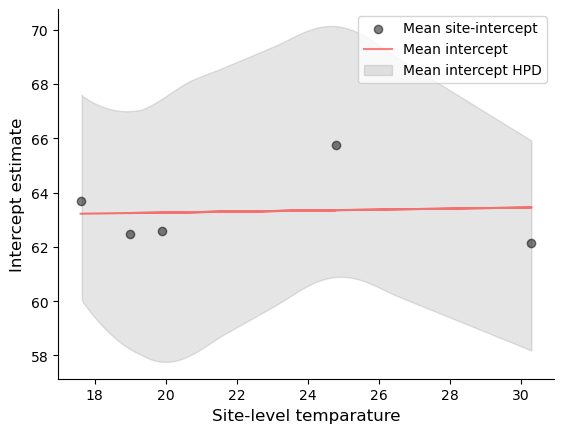

In [60]:
# 提取每个站点的温度
u = group_pred_trace.constant_data.u
# 提取组层面截距与温度的关系，体现在beta_0: beta_0 = gamma_0 + gamma_1 * u
beta_0 = group_pred_trace.posterior.beta_0.mean(dim=("chain","draw")).values
#提取每个站点的截距
beta_0j = group_pred_trace.posterior.beta_0j.mean(dim=("chain","draw"))
temp_hdi = az.hdi(group_pred_trace.posterior.beta_0j)
# 绘制每个站点的截距均值
plt.scatter(u, beta_0j,
        color="black",
        alpha=0.5,
        label="Mean site-intercept")
#绘制截距与温度之间的关系
plt.plot(u, beta_0,
        color="red",
        alpha=0.5,
        label="Mean intercept")
#绘制每个站点截距95%HDI
az.plot_hdi(
        u, group_pred_trace.posterior.beta_0j,
        hdi_prob=0.95,
        fill_kwargs={"alpha": 0.1, "color": "k", "label": "Mean intercept HPD"}
        )
#生成横坐标名称
plt.xlabel('Site-level temparature', fontsize=12)
# 生成纵坐标名称
plt.ylabel('Intercept estimate', fontsize=12)
plt.legend(loc="upper right")

sns.despine()

## 总结  

本节课介绍了如何使用将分层模型扩展到一般线性模型，以及广义线性模型。  

重点内容包括：  
* 如何根据研究问题和假设来确定模型  
* 如何在PyMC中定义分层模型，包括变化的截距、变化的斜率  
* 如何通过模型比较来检验不同的假设  
* 如何使用分层模型预测其他群体(站点)的结果  

🎉🎉🎉🎉🎉 最后，本课程的正式内容也到此为止，感谢大家参与本门课程，希望大家能在实践中应用课程中的知识和技能，提高自己统计分析的能力。  

通过本课程的学习，大家应该能对贝叶斯工作流有一个初步的理解，这将帮助你们更好地应用贝叶斯方法进行数据分析。  

![Image Name](https://cdn.kesci.com/upload/image/rkz1ehen1l.png?imageView2/0/w/720/h/960)  


本学期贝叶斯课程中使用了许多心理学研究中的示例。如果你们有兴趣查看其他示例研究，可以浏览去年的课件，我们已经将其上传到 Gitee 上，链接如下：  
https://gitee.com/hcp4715/PyBayesian/tree/master/Archive/2023/Notebooks  

<div style="padding-bottom: 30px;"></div>  

## 练习

本次练习以随机点运动范式的数据为例，并引入包含自变量时的层级模型，通过不同的模型验证不同的假设：  

* H0(model 0)，普通线性模型，仅考虑被试的反应时间。  
* H1(model 1)，变化截距模型，在模型0的基础上考虑点运动方向的一致性在不同被试上的变化。  
* H2(model 2)，变化斜率模型，在模型0的基础上不同被试间的反应时间的变化。  
* H3(model 3)，变化截距和斜率模型，结合模型1和模型2，同时考虑被试的反应时间和点运动方向的一致性之间的变化。  

注意，本次练习仅考虑部分池化模型的3种不同情况（即练习 model 1、model 2、model 3）。

In [57]:
# 导入 pymc 模型包，和 arviz 等分析工具 
import pymc as pm
import arviz as az
import seaborn as sns
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import ipywidgets
import bambi as bmb

# 忽略不必要的警告
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 使用 pandas 导入示例数据
try:
  df_raw  = pd.read_csv("/home/mw/input/bayes3797/evans2020JExpPsycholLearn_exp1_full_data.csv") 
except:
  df_raw  = pd.read_csv('data/evans2020JExpPsycholLearn_exp1_full_data.csv')

df_raw[["subject","RT"]]

,subject,RT
0,31727,3529
1,31727,2242
2,31727,979
3,31727,4526
4,31727,7387
...,...,...
64707,84421,1214
64708,84421,870
64709,84421,942
64710,84421,4359


由于被试数量较多，依旧使用其中5个被试的数据作为练习。

In [59]:
# 筛选出特定被试并创建索引
df_first5 = df_raw[df_raw['subject'].isin([81844, 83956, 83824, 66670, 80941])].query("percentCoherence in [5, 10]").copy()

# 为每个被试建立索引 'subj_id' 和 'obs_id'
df_first5['subj_id'] = df_first5['subject']
df_first5['obs_id'] = df_first5.groupby('subject').cumcount() + 1

# 对反应时间取对数
df_first5["log_RTs"] = np.log(df_first5["RT"])

# 为每一行生成全局唯一编号 'global_id'
df_first5['global_id'] = range(len(df_first5))

df_first5.head()

,subject,blkNum,trlNum,coherentDots,numberofDots,percentCoherence,winningDirection,response,correct,eventCount,averageFrameRate,RT,subj_id,obs_id,log_RTs,global_id
2239,66670,2,2,2,40,5,left,left,1,23,15.700,1465,66670,1,7.289611,0
2240,66670,2,3,2,40,5,left,left,1,25,15.375,1626,66670,2,7.393878,1
2241,66670,2,4,4,40,10,right,right,1,37,15.346,2411,66670,3,7.787797,2
2243,66670,2,6,2,40,5,left,left,1,16,16.113,993,66670,4,6.900731,3
2244,66670,2,7,4,40,10,left,left,1,16,15.564,1028,66670,5,6.935370,4


和上节课一样，我们需要通过链接函数（link function）来将反应时数据转换为正态分布。

公式为：

$$
\begin{align*}
\eta = \log(RT)  \\
\eta \sim \mathcal{N}(\mu, \sigma)  \\
\end{align*}
$$

* 其中，$\eta$是反应时的对数，$\mu$和$\sigma$是正态分布的均值和标准差。

注意，由于 RT 经过对数变化后其范围缩小，因此我们对先验进行设置时需要对 $\mu$ 和 $\sigma$ 进行缩放，以保持反应时数据的范围。
* 从上图中可以看出，反应时数据经过对数转换后的范围为 [5,10]。
* 因此，先验 $\mu$ 可以设置为 $\mu ~$，先验 $\sigma$ 的可以设置为: 

$$\begin{align*}
\mu \sim \mathcal{N}(7.5, 5)  \\
\sigma \sim Exp(1)  \\
\end{align*}
$$



###  Model1: Hierarchical model with varying intercepts  

相较于没有自变量的分层模型，构建包含自变量的分层模型的关键在于区分 **变量($\beta$)** 和 **分层(layer)** 的关系。  

$$  
\begin{array}{rll} 
\text{priors:} \;\; \;\; \;\; \;\; \beta_{0}  & \sim N(7, 1^2) & \\  
\beta_1  & \sim N(7.5, 5^2) & \\  
\sigma_y & \sim \text{Exp}(1)    & \\  
\sigma_0 & \sim \text{Exp}(1).    & \\  
\beta_{0j} | \beta_0, \sigma_0  & \stackrel{ind}{\sim} N(\beta_0, \sigma_0^2) & \text{(Layer2: 被试水平)} \\  
\text{likelihood:} \;\; \;\; Y_{ij} | \beta_{0j}, \beta_1, \sigma_y & \sim N(\mu_{ij}, \sigma_y^2) \;\; \text{ with } \;\;  \mu_{ij} = \beta_{0j} + \beta_1 X_{ij} & \text{(Layer1: 试次水平)} \\  
\end{array}  
$$

### Layer 2: Variability between Subject
**1. 随机点运动方向的一致性与反应时间之间的线性关系在被试间有什么不同**  

* 随机点运动方向的一致性与反应时间之间的线性关系由截距和斜率两方面构成  

* 我们认为在不同的被试 $j$ 之间，其截距是变化的  

* 假设截距的基线(baseline)为$\beta_{0}$，不同被试间的组间差异为$\sigma_{0}$，则每个被试的截距可以表示为：  

$$  
\beta_{0j} | \beta_0, \sigma_0 \stackrel{ind}{\sim} N(\beta_0, \sigma_0^2)  .  
$$

### Layer 1: Variability within Subject

**2. 随机点运动方向的一致性与反应时间之间的关系在被试内有什么不同**  

$$  
Y_{ij} | \beta_{j}, \beta_1, \sigma_y \sim N(\mu_{ij}, \sigma_y^2) \;\; \text{ where } \; \mu_{ij} = \beta_{0j} + \beta_1 X_{ij}  .  
$$  

* 使用$i$表示第$i$个试次，$i \in (1,2,3...n)$  
* 对于每一个被试来说，其反应时间服从以$\mu_{ij}$为均值，$\sigma_y$为标准差的正态分布  

* 而$\mu_{ij}$由参数$\beta_{0j}$，$\beta_1$决定  

    * 其中，$\beta_{0j}$在组与组之间不同(group-specific)  

    * $\beta_1$和$\sigma_y$则是相同的(global)

### Global priors （变化截距和斜率模型）
**3. 最后，我们考虑截距和斜率共同变化的情况，并全局参数进行定义，即$\beta_{0}, \beta_1,  \sigma_0$**  

$$  
\begin{array}{rll}  
\beta_{0}  & \sim N(m_0, s_0^2)  \\  
\beta_1  & \sim N(m_1, s_1^2) & \\  
\sigma_y & \sim \text{Exp}(l_y)    & \\  
\sigma_0 & \sim \text{Exp}(l_0)    & \\  
\end{array}  

$$

首先，考虑Model 1模型（变化截距）。

In [61]:
# 建立被试 ID 映射表
subject_mapping = {subj_id: idx for idx, subj_id in enumerate(df_first5["subj_id"].unique())}

# 将被试 ID 转换为索引
mapped_subject_id = df_first5["subj_id"].map(subject_mapping).values

# 定义函数来构建和采样模型
def run_var_inter_model():

    #定义数据坐标
    coords = {
    "subject": df_first5["subj_id"].unique(),
    "obs_id": df_first5["global_id"]}

    with pm.Model(coords=coords) as var_inter_model:
        
        # 对 RT 进行 log 变换
        log_RTs = pm.MutableData("log_RTs", np.log(df_first5['RT']))
        
        #定义全局参数
        beta_0 = pm.Normal("beta_0", mu=7, sigma=1)
        beta_0_sigma = pm.Exponential("beta_0_sigma", 1)
        beta_1 = pm.Normal("beta_1", mu=7.5, sigma=5)
        sigma_y = pm.Exponential("sigma_y", 1) 

        #传入自变量、获得观测值对应的被试映射
        x = pm.MutableData("x", df_first5.percentCoherence, dims="obs_id")
        subject = pm.MutableData("subject_id", mapped_subject_id, dims="obs_id") 
        
        #模型定义
        beta_0j = pm.Normal("beta_0j", mu=beta_0, sigma=beta_0_sigma, dims="subject")

        #线性关系
        mu = pm.Deterministic("mu", beta_0j[subject]+beta_1*x, dims="obs_id")

        # 定义 likelihood
        likelihood = pm.Normal("y_est", mu=mu, sigma=sigma_y, observed=log_RTs, dims="obs_id")

        var_inter_trace = pm.sample(draws=1000,           # 使用mcmc方法进行采样，draws为采样次数
                            tune=1000,                    # tune为调整采样策略的次数，可以决定这些结果是否要被保留
                            chains=4,                     # 链数
                            discard_tuned_samples= True,  # tune的结果将在采样结束后被丢弃
                            random_seed=84735,
                            target_accept=0.99)
    
    return var_inter_model, var_inter_trace

In [62]:
# 注意，以下代码可能运行5分钟左右

var_inter_model, var_inter_trace = run_var_inter_model()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, beta_0_sigma, beta_1, sigma_y, beta_0j]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


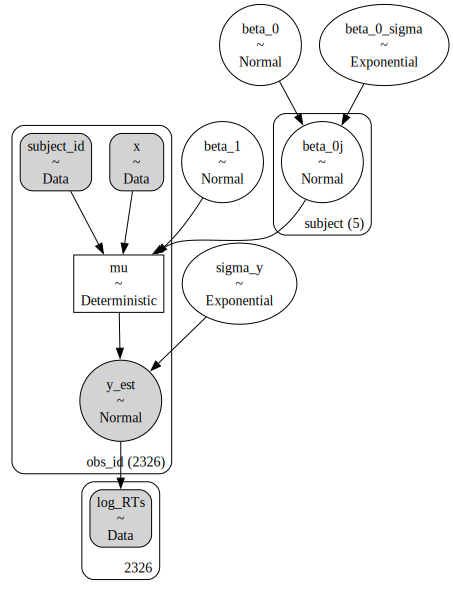

In [63]:
pm.model_to_graphviz(var_inter_model)

### 先验预测检查

In [64]:
var_inter_prior = pm.sample_prior_predictive(samples=500,
                                            model=var_inter_model,
                                            random_seed=84735)

Sampling: [beta_0, beta_0_sigma, beta_0j, beta_1, sigma_y, y_est]


In [65]:
#提取不同站点数据对应的索引并储存，便于后续将后验预测数据按照站点进行提取
def get_group_index(data):
    group_index = {}
    for i, group in enumerate(data["subj_id"].unique()):
        group_index[group] = data.loc[data["subj_id"] == group]["global_id"].values
    return group_index

# 定义绘制先验预测回归线的函数，其逻辑与绘制后验预测回归线相同
def plot_prior(prior,group_index):
    
    # 定义画布，根据站点数量定义画布的列数
    fig, ax = plt.subplots(1,len(df_first5["subj_id"].unique()), 
                        sharex=True,
                        sharey=True,
                        figsize=(20,5))
   
    for i, group in enumerate(df_first5["subj_id"].unique()): 
        #绘制回归线
        ax[i].plot(
            prior.constant_data["x"].sel(obs_id= group_index[group]),
            prior.prior["mu"].sel(obs_id = group_index[group]).stack(sample=("chain","draw")),
            c='gray',
            alpha=0.5
        )
        ax[i].set_title(f"{group}")
    fig.text(0.5, 0, 'percentCoherence', ha='center', va='center', fontsize=12)
    # 生成纵坐标名称
    fig.text(0.08, 0.5, 'RT', ha='center', va='center', rotation='vertical', fontsize=12)
    # 生成标题
    plt.suptitle("Prior regression models", fontsize=15, y=1)
        
    sns.despine()

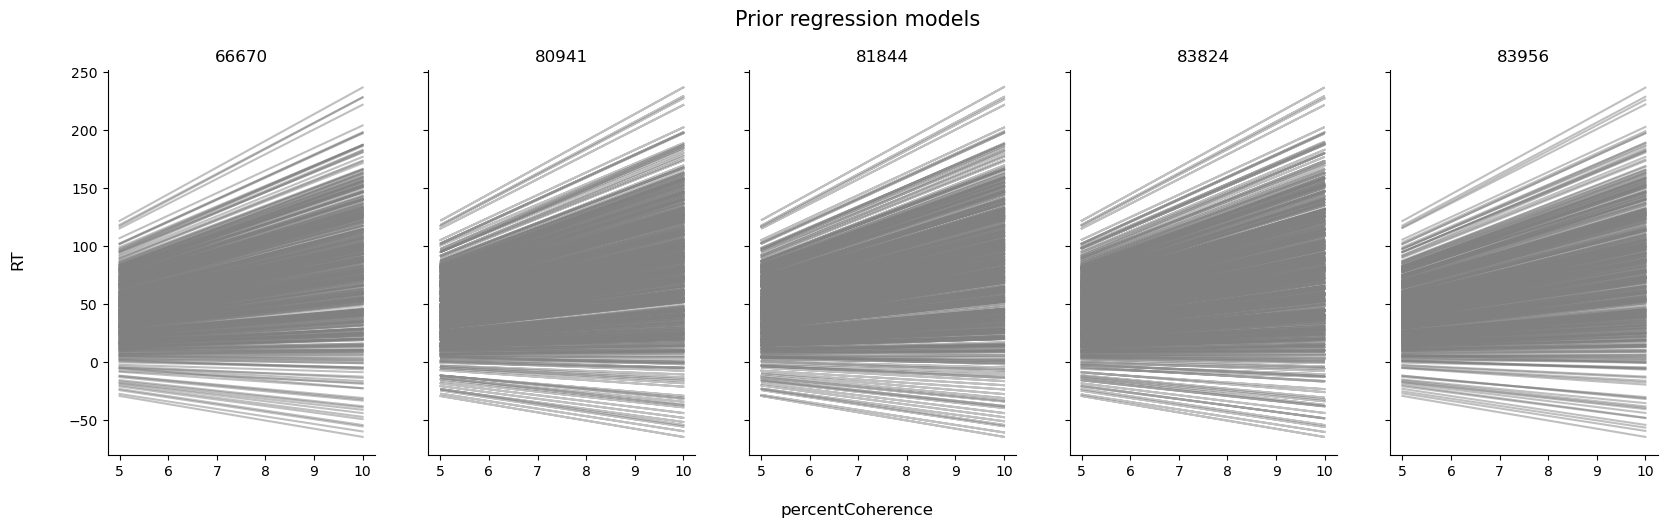

In [66]:
first5_index = get_group_index(data=df_first5)

plot_prior(prior=var_inter_prior,
           group_index=first5_index)

###  MCMC采样&后验参数估计  

In [67]:
# ~ 和filter_vars="like" 表示在显示结果时去除掉包含这些字符的变量
var_inter_para = az.summary(var_inter_trace,
           var_names=["~mu","~_sigma","~_offset","~sigma_"],
           filter_vars="like")
var_inter_para

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_0,7.146,0.287,6.607,7.679,0.007,0.005,2061.0,1429.0,1.0
beta_1,-0.013,0.005,-0.021,-0.004,0.000,0.000,891.0,1401.0,1.0
beta_0j[66670],6.988,0.043,6.903,7.063,0.001,0.001,1061.0,1831.0,1.0
beta_0j[80941],7.265,0.046,7.177,7.347,0.001,0.001,1199.0,1759.0,1.0
beta_0j[81844],6.487,0.041,6.413,6.567,0.001,0.001,1067.0,1643.0,1.0
beta_0j[83824],7.212,0.046,7.133,7.305,0.001,0.001,1173.0,2026.0,1.0
beta_0j[83956],7.816,0.048,7.727,7.905,0.001,0.001,1195.0,2438.0,1.0


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

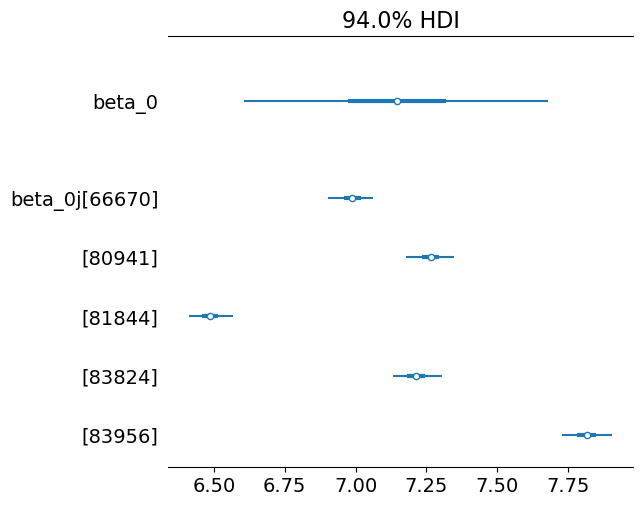

In [68]:
az.plot_forest(var_inter_trace,
           var_names=["~mu", "~sigma", "~offset", "~beta_1"],
           filter_vars="like",
           combined = True)

### 后验预测回归线  

* 5条回归线的截距不同，斜率相同

In [69]:
#定义函数，绘制不同站点下的后验预测回归线
def plot_partial_regression(data, trace, group_index):
    # 定义画布，根据站点数量定义画布的列数
    fig, ax = plt.subplots(1,len(data["subj_id"].unique()), 
                       sharex=True,
                       sharey=True,
                       figsize=(15,5))
    
    # 根据站点数来分别绘图
    # 我们需要的数据有原始数据，每一个因变量的后验预测均值
    # 这些数据都储存在后验参数采样结果中，也就是这里所用的trace
    for i, group in enumerate(data["subj_id"].unique()):
        #绘制真实数据的散点图
        x = trace.constant_data.x.sel(obs_id = group_index[group])
        y = trace.observed_data.y_est.sel(obs_id = group_index[group])
        mu = trace.posterior.mu.sel(obs_id = group_index[group])
        ax[i].scatter(x, y,
                color=f"C{i}",
                alpha=0.5)
        #绘制回归线
        ax[i].plot(x, mu.stack(sample=("chain","draw")).mean(dim="sample"),
                color=f"C{i}",
                alpha=0.5)
        ax[i].set_title(f"Intercept: {var_inter_para.loc[f'beta_0j[{group}]']['mean']}", fontsize=12)
        #绘制预测值95%HDI
        az.plot_hdi(
            x, mu,
            hdi_prob=0.95,
            fill_kwargs={"alpha": 0.25, "linewidth": 0},
            color=f"C{i}",
            ax=ax[i])
        
    # 生成横坐标名称
    fig.text(0.5, 0, 'percentCoherence', ha='center', va='center', fontsize=12)
    # 生成纵坐标名称
    fig.text(0.08, 0.5, 'RT', ha='center', va='center', rotation='vertical', fontsize=12)
    # 生成标题
    plt.suptitle("Posterior regression models(varing intercept)", fontsize=15, y=1.05)
        
    sns.despine()

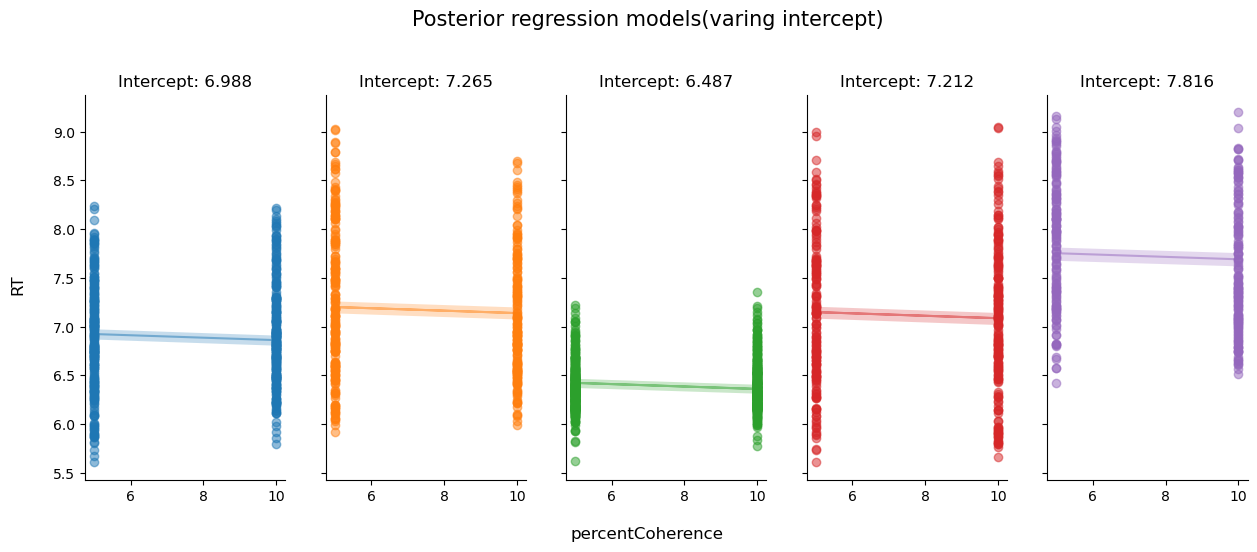

In [70]:
plot_partial_regression(data=df_first5,
                trace=var_inter_trace,
                group_index=first5_index)

### 组间方差与组内方差  

* 在这个模型定义中，组间方差来自`beta_0_offset`，组内方差来自`sigma_y`  

In [71]:
def calculate_var_odds(trace):
    # 提取组间和组内变异
    para_sum = az.summary(trace,
                        var_names=["mu","sigma_"],
                        filter_vars="like",
                        kind="stats"
                        )
    individual_par = para_sum.filter(like='mu', axis=0)["mean"]
    # 计算组间方差
    individual_par - individual_par.mean()
    normal_par = (individual_par - individual_par.mean()) / individual_par.std()
    tmp_df = df_first5.copy()
    tmp_df["mu"] = normal_par.values
    group_par = tmp_df.groupby("subject").mu.mean()
    between_sd = (group_par**2).sum()
    # 计算组内方差
    within_sd = para_sum.loc['sigma_y','mean']**2
    # 计算变异占比
    var = between_sd + within_sd
    print("被组间方差所解释的部分：", between_sd/var)
    print("被组内方差所解释的部分：", within_sd/var)
    print("组内相关：",between_sd/var)

calculate_var_odds(var_inter_trace)

被组间方差所解释的部分： 0.9448270030434267
被组内方差所解释的部分： 0.055172996956573336
组内相关： 0.9448270030434267


### Model2: Hierarchical model with varying slopes  

* 上一个模型考虑了回归截距随站点的变化，在模型2中，我们假设不同被试间的回归截距保持不变，但回归斜率随被试变化。  

$$  
\beta_{1j} | \beta_1, \sigma_1 \sim N(\beta_1, \sigma_1^2)  
$$  

类似于模型1，**模型2的定义形式为：**  

**prior**

$$  
\begin{array}{rll} 
\beta_{0}  & \sim N(7, 1^2) & \\  
\beta_1  & \sim N(7.5, 5^2) & \\  
\sigma_y & \sim \text{Exp}(1)    & \\  
\sigma_1 & \sim \text{Exp}(1).    & \\  
\end{array}  
$$  

**likelihood**

$$  
\begin{array}{rll}
\beta_{1j} | \beta_1, \sigma_1  & \stackrel{ind}{\sim} N(\beta_1, \sigma_1^2)  & \text{Layer 2: 被试水平} \\  
Y_{ij} | \beta_{0}, \beta_{1j}, \sigma_y & \sim N(\mu_{ij}, \sigma_y^2) \;\; \text{ with } \;\;  \mu_{ij} = \beta_{0} + \beta_{1j} X_{ij} & \text{Layer 1: 试次水平} \\  
\end{array}  
$$

In [72]:
# 定义函数来构建和采样模型
def run_var_slope_model():

    #定义数据坐标
    coords = {
    "subject": df_first5["subj_id"].unique(),
    "obs_id": df_first5["global_id"]}

    with pm.Model(coords=coords) as model:
        
        # 对 RT 进行 log 变换
        log_RTs = pm.MutableData("log_RTs", np.log(df_first5['RT']))
        
        #定义全局参数
        beta_0 = pm.Normal("beta_0", mu=7, sigma=1)
        beta_1 = pm.Normal("beta_1", mu=7.5, sigma=5)
        beta_1_sigma = pm.Exponential("beta_1_sigma", 1)
        sigma_y = pm.Exponential("sigma_y", 1) 

        #传入自变量、获得观测值对应的被试映射
        x = pm.MutableData("x", df_first5.percentCoherence, dims="obs_id")
        subject = pm.MutableData("subject_id", mapped_subject_id, dims="obs_id") 
        
        #模型定义
        beta_1j = pm.Normal("beta_1j", mu=beta_1, sigma=beta_1_sigma, dims="subject")

        #线性关系
        mu = pm.Deterministic("mu", beta_0+beta_1j[subject]*x, dims="obs_id")

        # 定义 likelihood
        likelihood = pm.Normal("y_est", mu=mu, sigma=sigma_y, observed=log_RTs, dims="obs_id")

        var_slope_trace = pm.sample(draws=1000,           # 使用mcmc方法进行采样，draws为采样次数
                            tune=1000,                    # tune为调整采样策略的次数，可以决定这些结果是否要被保留
                            chains=4,                     # 链数
                            discard_tuned_samples= True,  # tune的结果将在采样结束后被丢弃
                            random_seed=84735,
                            target_accept=0.99)
    
    return model, var_slope_trace

In [73]:
# 注意，以下代码可能运行5分钟左右
var_slope_model, var_slope_trace = run_var_slope_model()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, beta_1, beta_1_sigma, sigma_y, beta_1j]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.


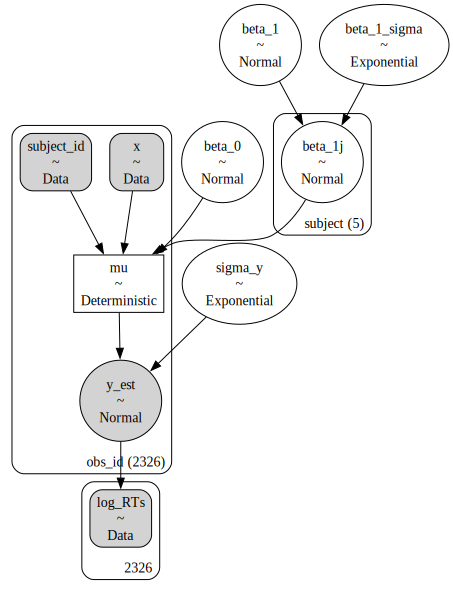

In [74]:
pm.model_to_graphviz(var_slope_model)

###  MCMC采样&后验参数估计  

In [75]:
var_slope_para = az.summary(var_slope_trace,
                            var_names=["beta_0","beta_1j"],
                            filter_vars="like")
var_slope_para 

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_0,7.016,0.038,6.943,7.085,0.002,0.001,627.0,1145.0,1.01
beta_1j[66670],-0.014,0.006,-0.025,-0.004,0.000,0.000,852.0,1639.0,1.01
beta_1j[80941],0.016,0.006,0.004,0.026,0.000,0.000,745.0,1871.0,1.00
beta_1j[81844],-0.074,0.005,-0.084,-0.064,0.000,0.000,761.0,1423.0,1.01
beta_1j[83824],0.011,0.006,0.000,0.023,0.000,0.000,815.0,1901.0,1.01
beta_1j[83956],0.078,0.006,0.065,0.088,0.000,0.000,833.0,1559.0,1.01


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

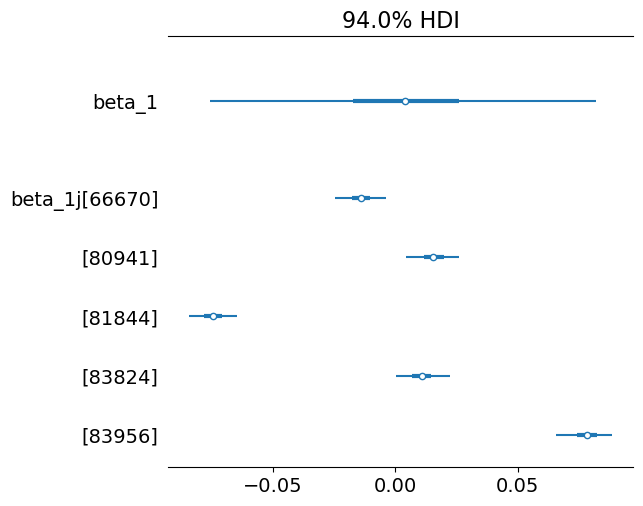

In [76]:
az.plot_forest(var_slope_trace,
           var_names=["~mu", "~sigma", "~offset", "~beta_0"],
           filter_vars="like",
           combined = True)

### 后验预测回归线  


In [77]:
#定义函数，绘制不同站点下的后验预测回归线
def plot_partial_regression(data, trace, group_index):
    # 定义画布，根据站点数量定义画布的列数
    fig, ax = plt.subplots(1,len(data["subj_id"].unique()), 
                       sharex=True,
                       sharey=True,
                       figsize=(15,5))
    
    # 根据站点数来分别绘图
    # 我们需要的数据有原始数据，每一个因变量的后验预测均值
    # 这些数据都储存在后验参数采样结果中，也就是这里所用的trace
    for i, group in enumerate(data["subj_id"].unique()):
        #绘制真实数据的散点图
        x = trace.constant_data.x.sel(obs_id = group_index[group])
        y = trace.observed_data.y_est.sel(obs_id = group_index[group])
        mu = trace.posterior.mu.sel(obs_id = group_index[group])
        ax[i].scatter(x, y,
                color=f"C{i}",
                alpha=0.5)
        #绘制回归线
        ax[i].plot(x, mu.stack(sample=("chain","draw")).mean(dim="sample"),
                color=f"C{i}",
                alpha=0.5)
        ax[i].set_title(f"Slope: {var_slope_para.loc[f'beta_1j[{group}]']['mean']}", fontsize=12)
        #绘制预测值95%HDI
        az.plot_hdi(
            x, mu,
            hdi_prob=0.95,
            fill_kwargs={"alpha": 0.25, "linewidth": 0},
            color=f"C{i}",
            ax=ax[i])
        
    # 生成横坐标名称
    fig.text(0.5, 0, 'percentCoherence', ha='center', va='center', fontsize=12)
    # 生成纵坐标名称
    fig.text(0.08, 0.5, 'RT', ha='center', va='center', rotation='vertical', fontsize=12)
    # 生成标题
    plt.suptitle("Posterior regression models(varing slope)", fontsize=15, y=1.05)
        
    sns.despine()

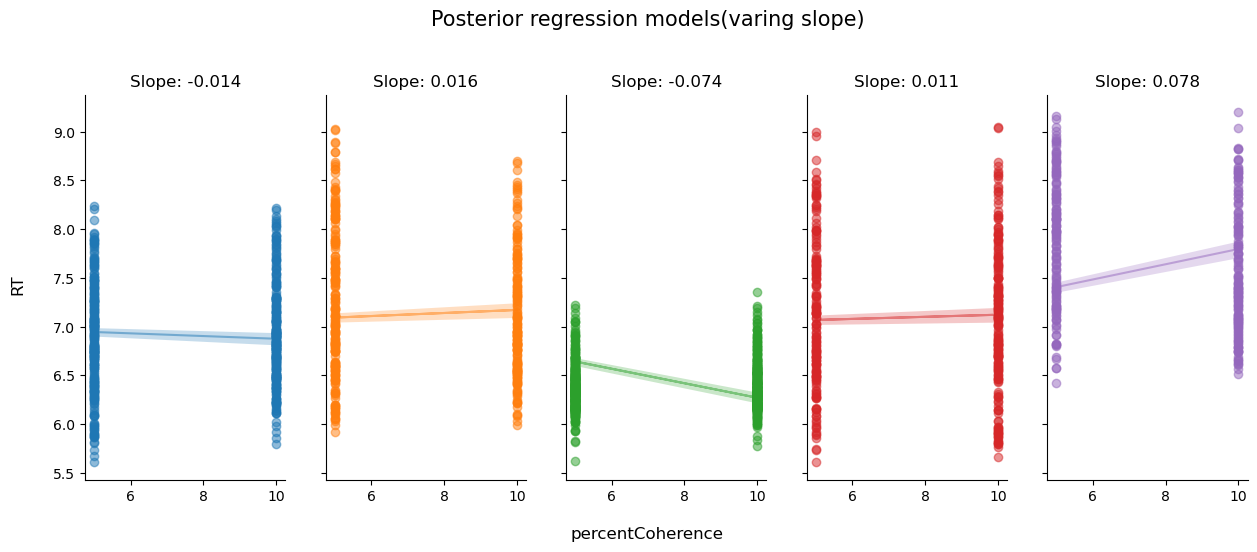

In [78]:
plot_partial_regression(data=df_first5,
                trace=var_slope_trace,
                group_index=first5_index)

### 组间方差与组内方差  

* 在这个模型定义中，组间方差来自`beta_1_offset`，组内方差来自`sigma_y`

In [79]:
def calculate_var_odds(trace):
    # 提取组间和组内变异
    para_sum = az.summary(trace,
                        var_names=["mu","sigma_"],
                        filter_vars="like",
                        kind="stats"
                        )
    individual_par = para_sum.filter(like='mu', axis=0)["mean"]
    # 计算组间方差
    individual_par - individual_par.mean()
    normal_par = (individual_par - individual_par.mean()) / individual_par.std()
    tmp_df = df_first5.copy()
    tmp_df["mu"] = normal_par.values
    group_par = tmp_df.groupby("subject").mu.mean()
    between_sd = (group_par**2).sum()
    # 计算组内方差
    within_sd = para_sum.loc['sigma_y','mean']**2
    # 计算变异占比
    var = between_sd + within_sd
    print("被组间方差所解释的部分：", between_sd/var)
    print("被组内方差所解释的部分：", within_sd/var)
    print("组内相关：",between_sd/var)

calculate_var_odds(var_slope_trace)

被组间方差所解释的部分： 0.9325495155743613
被组内方差所解释的部分： 0.06745048442563875
组内相关： 0.9325495155743613


### Model3: Hierarchical model with varying intercepts & slopes  

模型1 和模型2分别考虑了截距和斜率随着站点的变化，在模型3中我们将同时考虑截距和斜率在不同站点间的差异  

$$  
\beta_{0j} | \beta_0, \sigma_0 \sim N(\beta_0, \sigma_0^2)  
\;\;\;\; \text{ and } \;\;\;\;  
\beta_{1j} | \beta_1, \sigma_1 \sim N(\beta_1, \sigma_1^2)  
$$  

**Model3 可以定义为：**  

**prior**

$$  
\begin{array}{rll}  
\text{priors:} \;\; \;\; \;\; \;\;\beta_{0}  & \sim N(7, 1^2) & \\  
\beta_1  & \sim N(7.5, 5^2) & \\  
\sigma_0 & \sim \text{Exp}(1)    & \\  
\sigma_1 & \sim \text{Exp}(1)    & \\  
\sigma_y & \sim \text{Exp}(1).    & \\ 
\end{array}  
$$  

**likelihood**
$$  
\begin{array}{rll}  
\beta_{0j} | \beta_0, \sigma_0  & \stackrel{ind}{\sim} N(\beta_0, \sigma_0^2) & \text{Layer 2: 被试水平（截距在被试间的变化）} \\  
\beta_{1j} | \beta_1, \sigma_1  & \stackrel{ind}{\sim} N(\beta_1, \sigma_1^2) & \text{Layer 2: 被试水平（斜率在被试间的变化）} \\ 
\text{likelihood:} \;\; \;\; Y_{ij} | \beta_{0j}, \beta_{1j}, \sigma_y & \sim N(\mu_{ij}, \sigma_y^2) \;\; \text{ with } \;\;  \mu_{ij} = \beta_{0j} + \beta_{1j} X_{ij} & \text{Layer 1: 试次水平} \\   
\end{array}  
$$  


In [80]:
# 定义函数来构建和采样模型
def run_var_both_model():

    #定义数据坐标
    coords = {
    "subject": df_first5["subj_id"].unique(),
    "obs_id": df_first5["global_id"]}

    with pm.Model(coords=coords) as model:
        # 对 RT 进行 log 变换
        log_RTs = pm.MutableData("log_RTs", np.log(df_first5['RT']))

        #定义全局参数
        beta_0 = pm.Normal("beta_0", mu=7, sigma=1)
        beta_1 = pm.Normal("beta_1", mu=7.5, sigma=5) 
        beta_0_sigma = pm.Exponential("beta_0_sigma", 1)
        beta_1_sigma = pm.Exponential("beta_1_sigma", 1)
        sigma_y = pm.Exponential("sigma_y", 1) 

        #传入自变量、获得观测值对应的被试映射
        x = pm.MutableData("x", df_first5.percentCoherence, dims="obs_id")
        subject = pm.MutableData("subject_id", mapped_subject_id, dims="obs_id") 

        #模型定义
        beta_0j = pm.Normal("beta_0j", mu=beta_0, sigma=beta_0_sigma, dims="subject")
        beta_1j = pm.Normal("beta_1j", mu=beta_1, sigma=beta_1_sigma, dims="subject")

        #线性关系
        mu = pm.Deterministic("mu", beta_0j[subject]+beta_1j[subject]*x, dims="obs_id")

        # 定义 likelihood
        likelihood = pm.Normal("y_est", mu=mu, sigma=sigma_y, observed=log_RTs, dims="obs_id")

        var_both_trace = pm.sample(draws=1000,           # 使用mcmc方法进行采样，draws为采样次数
                            tune=1000,                    # tune为调整采样策略的次数，可以决定这些结果是否要被保留
                            chains=4,                     # 链数
                            discard_tuned_samples= True,  # tune的结果将在采样结束后被丢弃
                            random_seed=84735,
                            target_accept=0.99)
    
    return model, var_both_trace

In [81]:
# 注意，以下代码可能运行10分钟左右

var_both_model, var_both_trace = run_var_both_model()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, beta_1, beta_0_sigma, beta_1_sigma, sigma_y, beta_0j, beta_1j]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 47 seconds.


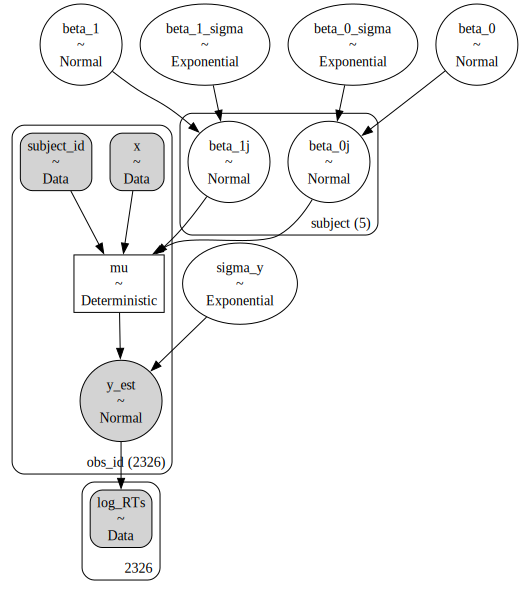

In [82]:
pm.model_to_graphviz(var_both_model)

###  MCMC采样&后验参数估计  


In [83]:
var_both_para = az.summary(var_both_trace,
                            var_names=["beta_0j","beta_1j"],
                            filter_vars="like")
var_both_para

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_0j[66670],6.860,0.079,6.719,7.012,0.002,0.001,2627.0,2466.0,1.0
beta_0j[80941],7.397,0.087,7.239,7.559,0.002,0.001,3156.0,2889.0,1.0
beta_0j[81844],6.386,0.064,6.261,6.500,0.001,0.001,2410.0,2410.0,1.0
beta_0j[83824],7.209,0.089,7.040,7.371,0.002,0.001,2253.0,2225.0,1.0
beta_0j[83956],8.127,0.106,7.920,8.322,0.002,0.002,2298.0,2383.0,1.0
beta_1j[66670],0.004,0.010,-0.013,0.024,0.000,0.000,2637.0,2558.0,1.0
beta_1j[80941],-0.030,0.011,-0.051,-0.010,0.000,0.000,3138.0,3120.0,1.0
beta_1j[81844],0.001,0.008,-0.014,0.016,0.000,0.000,2323.0,2228.0,1.0
beta_1j[83824],-0.012,0.011,-0.033,0.008,0.000,0.000,2310.0,2527.0,1.0
beta_1j[83956],-0.054,0.013,-0.080,-0.029,0.000,0.000,2363.0,2593.0,1.0


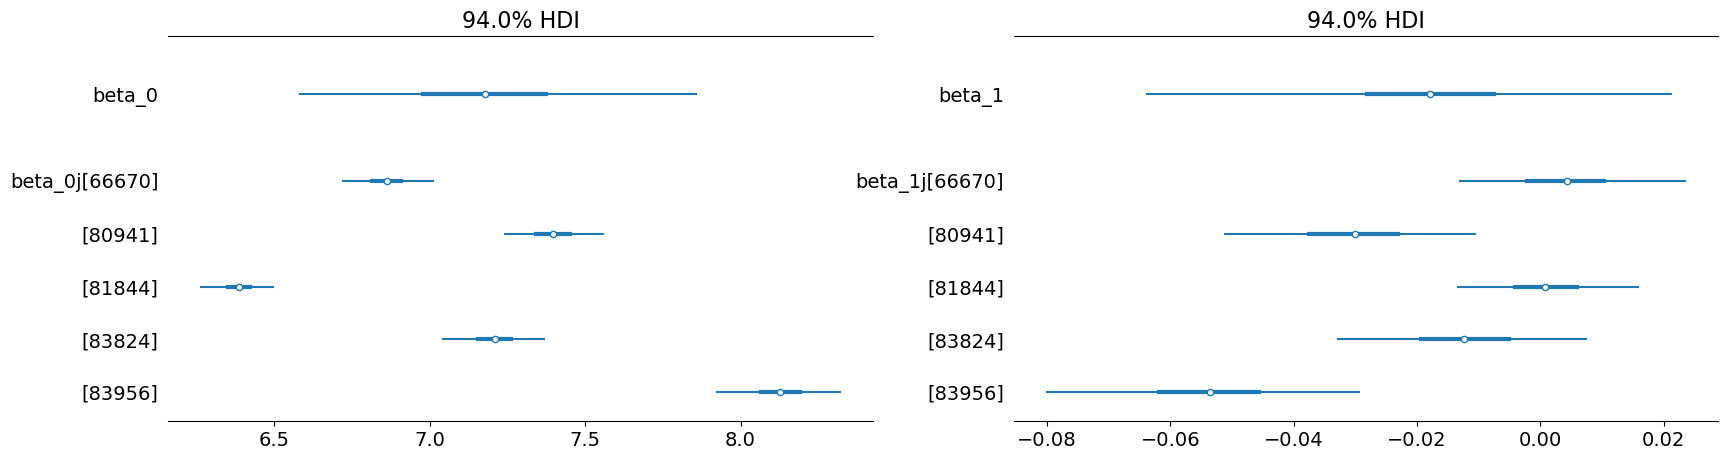

In [84]:
# 设置绘图坐标
figs, (ax1, ax2) = plt.subplots(1,2, figsize = (20,5))
# 绘制变化的截距
az.plot_forest(var_both_trace,
           var_names=["~mu", "~sigma", "~offset", "~beta_1"],
           filter_vars="like",
           combined = True,
           ax=ax1)
# 绘制变化的斜率
az.plot_forest(var_both_trace,
           var_names=["~mu", "~sigma", "~offset", "~beta_0"],
           filter_vars="like",
           combined = True,
           ax=ax2)
plt.show()

### 后验预测回归线  

In [85]:
#定义函数，绘制不同站点下的后验预测回归线
def plot_partial_regression(data, trace, group_index):
    # 定义画布，根据站点数量定义画布的列数
    fig, ax = plt.subplots(1,len(data["subj_id"].unique()), 
                       sharex=True,
                       sharey=True,
                       figsize=(15,5))
    
    for i, group in enumerate(data["subj_id"].unique()):
        #绘制真实数据的散点图
        x = trace.constant_data.x.sel(obs_id = group_index[group])
        y = trace.observed_data.y_est.sel(obs_id = group_index[group])
        mu = trace.posterior.mu.sel(obs_id = group_index[group])
        ax[i].scatter(x, y,
                color=f"C{i}",
                alpha=0.5)
        #绘制回归线
        ax[i].plot(x, mu.stack(sample=("chain","draw")).mean(dim="sample"),
                color=f"C{i}",
                alpha=0.5)
        ax[i].set_title(f"Slope: {var_both_para.loc[f'beta_1j[{group}]']['mean']}\nIntercept: {var_both_para.loc[f'beta_0j[{group}]']['mean']}", 
        fontsize=12)
        #绘制预测值95%HDI
        az.plot_hdi(
            x, mu,
            hdi_prob=0.95,
            fill_kwargs={"alpha": 0.25, "linewidth": 0},
            color=f"C{i}",
            ax=ax[i])
        
    # 生成横坐标名称
    fig.text(0.5, 0, 'percentCoherence', ha='center', va='center', fontsize=12)
    # 生成纵坐标名称
    fig.text(0.08, 0.5, 'RT', ha='center', va='center', rotation='vertical', fontsize=12)
    # 生成标题
    plt.suptitle("Posterior regression models(varing slope and intercept)", fontsize=15, y=1.05)
        
    sns.despine()

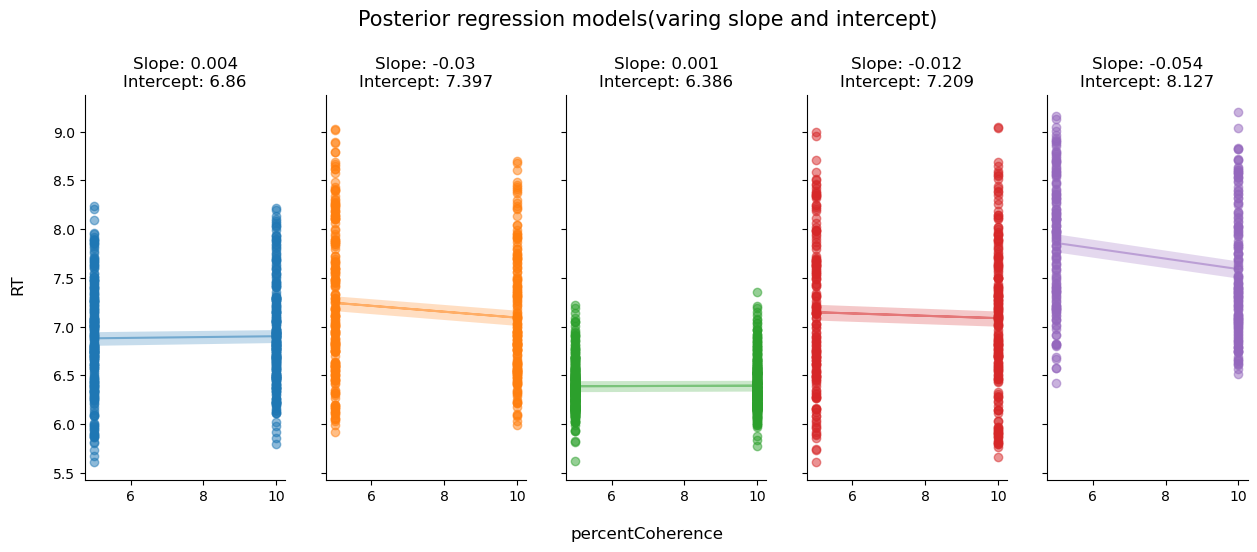

In [86]:
plot_partial_regression(data=df_first5,
                trace=var_both_trace,
                group_index=first5_index)

### 组间方差与组内方差  

* 在这个模型定义中，组间方差来自`beta_0_offset`、`beta_1_offset`，组内方差来自`sigma_y`

In [87]:
calculate_var_odds(var_inter_trace)

被组间方差所解释的部分： 0.9448270030434267
被组内方差所解释的部分： 0.055172996956573336
组内相关： 0.9448270030434267


### 评估后验预测  

* 在之前的课程中，我们介绍过对后验预测结果进行评估的两种方法  

* 一是**MAE**，即后验预测值与真实值之间预测误差的中位数，二是**within_95**，即真实值是否落在95%后验预测区间内  

* 在这里我们调用之前写过的计算两种指标的方法，评估三个模型的后验预测结果

In [88]:
# 对三种不同情况下的部分池化模型进行后验预测 
var_inter_ppc = pm.sample_posterior_predictive(var_inter_trace,
                                                model = var_inter_model,
                                                random_seed=84735)
var_slope_ppc = pm.sample_posterior_predictive(var_slope_trace,
                                                model = var_slope_model,
                                                random_seed=84735)                                                                                       
var_both_ppc = pm.sample_posterior_predictive(var_both_trace, 
                                            model = var_both_model,
                                            random_seed=84735)

Sampling: [y_est]


Output()

Sampling: [y_est]


Output()

Sampling: [y_est]


Output()

In [89]:
# 定义计算 MAE 函数
from statistics import median
def MAE(model_ppc):
    # 计算每个X取值下对应的后验预测模型的均值
    pre_x = model_ppc.posterior_predictive["y_est"].stack(sample=("chain", "draw"))
    pre_y_mean = pre_x.mean(axis=1).values

    # 提取观测值Y，提取对应Y值下的后验预测模型的均值
    MAE = pd.DataFrame({
        "scontrol_ppc_mean": pre_y_mean,
        "scontrol_original": model_ppc.observed_data.y_est.values
    })

    # 计算预测误差
    MAE["pre_error"] = abs(MAE["scontrol_original"] -\
                            MAE["scontrol_ppc_mean"])

    # 最后，计算预测误差的中位数
    MAE = median(MAE.pre_error)
    return MAE

In [90]:
# 定义
def counter_outlier(model_ppc, hdi_prob=0.95):
    # 将az.summary生成的结果存到hdi_multi这个变量中，该变量为数据框
    hdi = az.summary(model_ppc, kind="stats", hdi_prob=hdi_prob)
    lower = hdi.iloc[:,2].values
    upper = hdi.iloc[:,3].values

    # 将原数据中的自我控制分数合并，便于后续进行判断
    y_obs = model_ppc.observed_data["y_est"].values

    # 判断原数据中的压力分数是否在后验预测的95%可信区间内，并计数
    hdi["verify"] = (y_obs <= lower) | (y_obs >= upper)
    hdi["y_obs"] = y_obs
    hdi_num = sum(hdi["verify"])

    return hdi_num

In [91]:
# 将每个模型的PPC储存为列表
ppc_samples_list = [var_inter_ppc, var_slope_ppc, var_both_ppc]
model_names = ["变化截距", "变化斜率", "变化截距、斜率"]

# 建立一个空列表来存储结果
results_list = []

# 遍历模型并计算MAE和超出95%hdi的值
for model_name, ppc_samples in zip(model_names, ppc_samples_list):
    outliers = counter_outlier(ppc_samples)
    MAEs = MAE(ppc_samples)
    results_list.append({'Model': model_name, 'MAE':MAEs, 'Outliers': outliers})

# 从结果列表创建一个DataFrame
results_df = pd.DataFrame(results_list)

results_df

,Model,MAE,Outliers
0,变化截距,0.315457,152
1,变化斜率,0.364399,152
2,变化截距、斜率,0.308689,149


In [92]:
pm.compute_log_likelihood(var_inter_trace, model=var_inter_model)
pm.compute_log_likelihood(var_slope_trace, model=var_slope_model)
pm.compute_log_likelihood(var_both_trace, model=var_both_model)

Output()

Output()

Output()

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data
	> constant_data

In [93]:
comparison_list = {
    "model1(hierarchical intercept)":var_inter_trace,
    "model2(hierarchical slope)":var_slope_trace,
    "model3(hierarchy both)":var_both_trace,
}
az.compare(comparison_list)

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
model3(hierarchy both),0,-1941.428779,12.975288,0.000000,9.120727e-01,37.053368,0.000000,False,log
model1(hierarchical intercept),1,-1950.270204,8.295075,8.841425,8.792730e-02,36.867145,4.618147,False,log
model2(hierarchical slope),2,-2063.994110,7.638388,122.565331,1.038059e-13,36.052334,14.625979,False,log


## 补充材料  
### Hierarchical logistic regression

> 在之前的课程中，除了正态回归模型，我们还介绍过logistic回归模型、泊松回归模型和负二项回归模型。这些模型同样可以和层级模型结合  

* 在lec13中我们使用回避依恋分数来预测个体的恋爱情况，假设这一线性关系在不同文化中有不同的表现，我们也可以把站点信息考虑在内  

* 对于因变量为离散变量的情况，我们需要使用广义线性模型(Generalized linear model，GLM)。  

* 其特点为：  
	- 分布簇 (dist)不再局限于正态分布，而是允许其他不同的分布，比如 $y \sim Bernoulli(p)$  
	- 需要 **链接函数$g()$** 将 $\alpha + \beta * x$  映射到 $p$所在的范围  

| 一般线性模型 | 广义线性模型 |  
|---|---|  
| $y \sim Normal(\mu, \sigma)$ | $y \sim dist(p)$ |  
| $\mu = \alpha + \beta *x$ | $p = g(z)$|  
|  | $z = \alpha + \beta *x$|  


In [106]:
#查看所需列中是否存在缺失值
df_first5[df_first5[["romantic", "avoidance_r"]].isna().any(axis=1)]

In [107]:
#删除缺失值
df_first5.dropna(subset=["romantic", "avoidance_r"], inplace=True)
#再次查看所需列中是否存在缺失值
df_first5[df_first5["romantic"].isna()]

In [108]:
#对数据进行重新编码
df_first5["romantic"] =  np.where(df_first5['romantic'] == 2, 0, 1)

In [109]:
# 创建画图所需的网格数
g = sns.FacetGrid(df_first5, col="Site", col_wrap=5, height=4)

# 将各个图所画的内容对应到画布上
g.map(sns.regplot, "avoidance_r", "romantic")

# 调整y轴的刻度
plt.ylim(-0.5,1.5)
plt.yticks([0,1])
# Show the plot
plt.show()

#### 完全池化模型  

#### 模型定义  

在这里，对完全池化模型的定义，和我们在lec13中介绍过的logistic回归模型是一样的  

对先前介绍过的模型定义进行回顾：  

* 因变量恋爱情况为二分变量  

$$  
Y_{ij} = \begin{cases}  
1 & \text{yes} \\  
0 & \text{no} \\  
\end{cases}  
$$  

* 恋爱情况与回避依恋分数的情况可以表示为：  
$$  
\begin{split}  
Y_{ij}|\beta_0,\beta_1 & \stackrel{ind}{\sim} \text{Bern}(\pi_{ij}) \;\; \text{ with } \;\; \pi_i = \frac{e^{\beta_0 + \beta_1 X_{ij}}}{1 + e^{\beta_0 + \beta_1 X_{ij}}}  \\  
\beta_{0}  &  \sim N\left(0, 0.5^2 \right)  \\  
\beta_1  &  \sim N\left(0, 0.5^2 \right)   \\  
\end{split}  
$$  

* 注意对$\beta_0,\beta_1$在整体logistic回归中的意义，在这里仅简单解释为线性关系中的斜率和截距  

> 注：在代码的模型定义中，我们使用的是bambi默认的先验，此处先验定义中的具体数值只为辅助说明使用。

#### MCMC采样&后验参数估计

In [110]:
complete_logit_bmb = bmb.Model("romantic ~ avoidance_r", 
                               df_first5, 
                               family="bernoulli")
complete_logit_trace = complete_logit_bmb.fit(random_seed=84735)

**后验参数解释**  

* `avoidance_r`为共同的斜率  

* `Intercept`为共同的截距  


In [111]:
az.summary(complete_logit_trace)

#### 变化截距模型  

#### 模型定义  

* 考虑线性关系(截距)在不同站点间的不同  

$$  
\begin{array}{rll}  
Y_{ij}|\beta_{0j},\beta_{1j} & \sim \text{Bern}(\pi_{ij})\; \text{ with } \;\; \pi_i = \frac{e^{\beta_{0j} + \beta_{1} X_{ij}}}{1 + e^{\beta_{0j} + \beta_{1} X_{ij}}} \\  
&& \text{(每个站点 $j$内的线性模型)}\\  

\beta_{0j} &= \beta_0 + b_{0j}\;\;\;b_{0j} \sim N(0, \sigma_0^2)& \text{(截距在站点间的变化)} \\  

\beta_{0}  &  \sim N\left(0, 0.5^2 \right) & \text{(全局参数的先验)}\\  
\beta_1  &  \sim N\left(0, 0.5^2 \right) & \\  
\sigma_0 & \sim \text{Exp}(1) & \\  
\end{array}  

$$  

* 模型图中的`Intercept`即为$\beta_{0}$，`1|Site`即为$b_{0j}$

In [112]:
# common slope/ common intercept + group-specific intercept
inter_logit_bmb = bmb.Model("romantic ~ avoidance_r + (1|Site)",
                               df_first5,
                               family="bernoulli")
inter_logit_bmb.build()
inter_logit_bmb.graph()

#### MCMC采样&后验参数估计

In [113]:
inter_logit_trace = inter_logit_bmb.fit(draws=5000,           
                                    tune=1000,                    
                                    chains=4,                     
                                    discard_tuned_samples= True,  
                                    random_seed=84735,
                                    target_accept=0.99)

**后验参数解释**  

* `avoidance_r`为共同的斜率  

* `Intercept`为共同的截距  

* `1|Site[xx]`为每一组在截距上的变异  

    * 如，Kassel站点的截距为：0.250+0.336 = 0.586

In [114]:
az.summary(inter_logit_trace)

#### 变化斜率模型  

#### 模型定义  

* 考虑线性关系(斜率)在不同站点间的不同  

$$  
\begin{array}{rll}  
Y_{ij}|\beta_{0j},\beta_{1j} & \sim \text{Bern}(\pi_{ij})\; \text{ with } \;\; \pi_i = \frac{e^{\beta_{0} + \beta_{1j} X_{ij}}}{1 + e^{\beta_{0} + \beta_{1j} X_{ij}}} \\  
&& \text{(每个站点 $j$内的线性模型)}\\  
\beta_{1j} &= \beta_1 + b_{1j}\;\;\;b_{1j} \sim N(0, \sigma_1^2)& \text{(斜率在站点间的变化)} \\  

\beta_{0}  &  \sim N\left(0, 0.5^2 \right) & \text{(全局参数的先验)}\\  
\beta_1  &  \sim N\left(0, 0.5^2 \right) & \\  
\sigma_1 & \sim \text{Exp}(1) & \\  
\end{array}  

$$

In [115]:
# common slope +group-specific slope/ common intercept + group-specific intercept
slope_logit_bmb = bmb.Model("romantic ~ avoidance_r + (0 + avoidance_r|Site)",
                               df_first5,
                               family="bernoulli")
slope_logit_bmb.build()
slope_logit_bmb.graph()

#### MCMC采样&后验参数估计

In [116]:
slope_logit_trace = slope_logit_bmb.fit(draws=5000,           
                                    tune=1000,                    
                                    chains=4,                     
                                    discard_tuned_samples= True,  
                                    random_seed=84735,
                                    target_accept=0.99)

**后验参数解释**  

* `Intercept`为共同的截距  

* `avoidance_r`为共同的斜率  

* `avoidance_r|Site[xx]`为每一组在斜率上的变异  

    * 如，Kassel站点的斜率为：0.003+0.036 = 0.039

In [117]:
az.summary(slope_logit_trace)

#### 变化斜率、截距模型  

#### 模型定义  

* 考虑线性关系在不同站点间的不同  

$$  
\begin{array}{rll}  
Y_{ij}|\beta_{0j},\beta_{1j} & \sim \text{Bern}(\pi_{ij})\; \text{ with } \;\; \pi_i = \frac{e^{\beta_{0j} + \beta_{1j} X_{ij}}}{1 + e^{\beta_{0j} + \beta_{1j} X_{ij}}} \\  
&& \text{(每个站点 $j$内的线性模型)}\\  

\beta_{0j} &= \beta_0 + b_{0j}\;\;\;b_{0j} \sim N(0, \sigma_0^2)& \text{(截距在站点间的变化)} \\  

\beta_{1j} &= \beta_1 + b_{1j}\;\;\;b_{1j} \sim N(0, \sigma_1^2)& \text{(斜率在站点间的变化)} \\  

\beta_{0}  &  \sim N\left(0, 0.5^2 \right) & \text{(全局参数的先验)}\\  
\beta_1  &  \sim N\left(0, 0.5^2 \right) & \\  
\sigma_0 & \sim \text{Exp}(1) & \\  
\sigma_1 & \sim \text{Exp}(1) & \\  
\end{array}  

$$

In [118]:
# common slope +group-specific slope/ common intercept + group-specific intercept
both_logit_bmb = bmb.Model("romantic ~ avoidance_r + (avoidance_r|Site)",
                               df_first5,
                               family="bernoulli")
both_logit_bmb.build()
both_logit_bmb.graph()

#### MCMC采样&后验参数解释

In [119]:
both_logit_trace = both_logit_bmb.fit(draws=5000,           
                                    tune=1000,                    
                                    chains=4,                     
                                    discard_tuned_samples= True,  
                                    random_seed=84735,
                                    target_accept=0.99)

In [120]:
both_logit_trace

In [121]:
az.plot_trace(both_logit_trace,
              var_names=["~sigma"],
              filter_vars="like",
              figsize=(12, 15))
plt.show()

**后验参数解释**  

* `Intercept`为共同的截距  

* `avoidance_r`为共同的斜率  

* `1|Site[xx]`为每一组在截距上的变异  

* `avoidance_r|Site[xx]`为每一组在斜率上的变异  

    * Kassel站点的斜率为：0.008 + 0.036 = 0.044  

    * Kassel站点的截距为：0.239 + 0.350 = 0.589

In [122]:
az.summary(both_logit_trace)

#### 后验预测分布

In [123]:
posterior_predictive = both_logit_bmb.predict(both_logit_trace, kind="pps")

In [124]:
az.plot_ppc(both_logit_trace,
            num_pp_samples=500)

### 预测新站点的数据  

* 使用`.predict`，传入模型的MCMC采样结果和新的数据集，就可以在原有模型的基础上对新数据进行预测

In [125]:
# 选择站点为"Zurich"的数据
new_group = df_raw[df_raw.Site=="Zurich"]
# 生成被试索引
new_group["obs_id"] = range(len(new_group))
# 生成站点索引
new_group["site_idx"] = pd.factorize(new_group.Site)[0]
# 删除缺失值
new_group.dropna(subset=["romantic", "avoidance_r"], inplace=True)
new_group[new_group["romantic"].isna()]
# 对数据进行重新编码
new_group["romantic"] =  np.where(new_group['romantic'] == 2, 0, 1)

In [126]:
both_logit_bmb.predict(both_logit_trace,
                       kind="mean",
                       data=new_group,
                       sample_new_groups=True,
                       inplace=False)

### Pymc code for Hierarchical logistic regression  

* 在这里，我们也补充对于完全池化模型与变化斜率&截距模型的 pymc 代码，可以自行学习

In [127]:
coords = {"obs_id": df_first5.obs_id}
with pm.Model(coords=coords) as complete_log:
    #传入自变量与因变量
    x = pm.MutableData("x", df_first5.avoidance_r, dims="obs_id")
    y = pm.MutableData('y', df_first5.romantic, dims = 'obs_id')

    #先验
    beta_0 = pm.Normal("beta_0", mu=0, sigma=0.5)          #定义beta_0          
    beta_1 = pm.Normal("beta_1", mu=0, sigma=0.5)          #定义beta_1
    #线性关系
    mu = pm.Deterministic("mu", beta_0 + beta_1 * x, dims="obs_id")
    #注意此处使用了Logistic sigmoid function：pm.math.invlogit
    #相当于进行了如下计算 (1 / (1 + exp(-mu))
    pi = pm.Deterministic("pi", pm.math.invlogit(mu), dims="obs_id")
    #似然
    likelihood = pm.Bernoulli("y_est",p=pi, observed=y,dims="obs_id")

    complete_log_trace = pm.sample(draws=5000,            # 使用mcmc方法进行采样，draws为采样次数
                            tune=1000,                    # tune为调整采样策略的次数，可以决定这些结果是否要被保留
                            chains=4,                     # 链数
                            discard_tuned_samples= True,  # tune的结果将在采样结束后被丢弃
                            random_seed=84735,
                            target_accept=0.99)

In [128]:
#获得新数据集的索引
logit_index = get_group_index(data=df_first5)

In [129]:
#绘图逻辑与上一个函数一样，只是此处使用logistic回归，绘制的变量需要更改
def plot_logit_regression(data,trace,group_index):
    # 定义画布，根据站点数量定义画布的列数
    fig, ax = plt.subplots(1,len(data["Site"].unique()), 
                        sharex=True,
                        sharey=True,
                        figsize=(15,5))
    
    # 根据站点数来分别绘图
    # 我们需要的数据有原始数据，每一个因变量的后验预测均值
    # 这些数据都储存在后验参数采样结果中，也就是这里所用的trace
    for i, group in enumerate(data["Site"].unique()):
        x = trace.constant_data.x.sel(obs_id = group_index[f"{group}"])
        #得到每个站点内的恋爱概率均值，并设置标题
        pi_mean = trace.posterior.pi.sel(obs_id = group_index[f"{group}"]).mean().values
        ax[i].set_title(f"Bern({pi_mean:.2f})")

        #绘制真实数据散点图
        ax[i].scatter(x,
                trace.observed_data.y_est.sel(obs_id = group_index[f"{group}"]),
                color=f"C{i}",
                alpha=0.2)
    # 生成横坐标名称    
    fig.text(0.5, 0, 'Avoidance', ha='center', va='center', fontsize=12)
    # 生成纵坐标名称
    fig.text(0.08, 0.5, 'Romantic', ha='center', va='center', rotation='vertical', fontsize=12)
    # 改变刻度
    plt.yticks([0,1])
    # 生成标题
    plt.suptitle("Posterior regression models", fontsize=15,y=1.05)
    
    sns.despine()

In [130]:
plot_logit_regression(data=df_first5,
                      trace=complete_log_trace,
                      group_index=logit_index)

### 层级模型  

$$  

\begin{array}{rll}  
Y_{ij}|\beta_{0j},\beta_{1j} & \sim \text{Bern}(\pi_{ij})\; \text{ with } \;\; \pi_i = \frac{e^{\beta_{0j} + \beta_{1j} X_{ij}}}{1 + e^{\beta_{0j} + \beta_{1j} X_{ij}}} \\  
&& \text{(每个站点 $j$内的线性模型)}\\  
\beta_{0j} | \beta_0, \sigma_0    & \stackrel{ind}{\sim} N(\beta_0, \sigma_0^2) & \text{(截距在站点间的变化)} \\  
\beta_{1j} | \beta_1, \sigma_1    & \stackrel{ind}{\sim} N(\beta_1, \sigma_1^2) & \text{(斜率在站点间的变化)} \\  
\beta_{0}  &  \sim N\left(0, 0.5^2 \right) & \text{(全局参数的先验)}\\  
\beta_1  &  \sim N\left(0, 0.5^2 \right) & \\  
\sigma_0 & \sim \text{Exp}(1). & \\  
\sigma_1 & \sim \text{Exp}(1). & \\  
\end{array}  

$$

In [131]:
non = True
coords = {"site": df_first5["Site"].unique(),
          "obs_id": df_first5.obs_id}
with pm.Model(coords=coords) as hier_log:
    #传入自变量与因变量
    x = pm.MutableData("x", df_first5.avoidance_r, dims="obs_id")
    y = pm.MutableData('y', df_first5.romantic, dims = 'obs_id')

    #定义全局参数
    beta_0 = pm.Normal("beta_0", mu=0, sigma=0.5)          #定义beta_0
    beta_0_sigma = pm.Exponential("beta_0_sigma", 1)          
    beta_1 = pm.Normal("beta_1", mu=0, sigma=0.5)          #定义beta_1
    beta_1_sigma = pm.Exponential("beta_1_sigma", 1)

    #获得观测值对应的站点映射
    site = pm.MutableData("site", df_first5.site_idx, dims="obs_id") 

    #选择不同的模型定义方式，定义截距、斜率
    if non:
        beta_0_offset = pm.Normal("beta_0_offset", 0, sigma=1, dims="site")
        beta_0j = pm.Deterministic("beta_0j", beta_0 + beta_0_offset * beta_0_sigma, dims="site")
        beta_1_offset = pm.Normal("beta_1_offset", 0, sigma=1, dims="site")
        beta_1j = pm.Deterministic("beta_1j", beta_1 + beta_1_offset * beta_1_sigma, dims="site")
    else:
        beta_0j = pm.Normal("beta_0j", mu=beta_0, sigma=beta_0_sigma, dims="site")
        beta_1j = pm.Normal("beta_1j", mu=beta_1, sigma=beta_1_sigma, dims="site")

    #线性关系
    mu = pm.Deterministic("mu", beta_0j[site] + beta_1j[site] * x, dims="obs_id")
    #进行logit变换
    pi = pm.Deterministic("pi", pm.math.invlogit(mu), dims="obs_id")
    #似然
    likelihood = pm.Bernoulli("y_est",p=pi, observed=y,dims="obs_id")

    hier_log_trace = pm.sample(draws=5000,            # 使用mcmc方法进行采样，draws为采样次数
                        tune=1000,                    # tune为调整采样策略的次数，可以决定这些结果是否要被保留
                        chains=4,                     # 链数
                        discard_tuned_samples= True,  # tune的结果将在采样结束后被丢弃
                        random_seed=84735,
                        target_accept=0.99)

In [132]:
az.summary(hier_log_trace)

In [133]:
plot_logit_regression(data=df_first5,
                      trace=hier_log_trace,
                      group_index=logit_index)